<a href="https://colab.research.google.com/github/Staglabite/PraktikumML-B1/blob/main/Tugas3_MochammadQaynanMahdaviqya_PMB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Mochammad Qaynan Mahdaviqya

NIM: 24060122140170

LAB: B1

1). Lakukan agglomerative clustering untuk dataset random yang tersedia di atas dengan single linkage dan average linkage! Jelaskan perbedaannya!

In [13]:
import numpy as np
import pandas as pd

from scipy import ndimage
from scipy.cluster import hierarchy

from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

from sklearn.datasets import make_blobs
%matplotlib inline


In [14]:
X, y = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)


menghasilkan sebuah dataset buatan menggunakan fungsi make_blobs dari sklearn. Fungsi ini menghasilkan data acak dalam bentuk titik-titik (samples) yang dikelompokkan ke dalam beberapa pusat (centers). Dalam kode ini, sebanyak 50 sampel (n_samples=50) dibuat dengan 4 pusat cluster yang ditentukan secara eksplisit pada koordinat [[4,4], [-2, -1], [1, 1], [10, 4]]. Parameter cluster_std=0.9 menentukan deviasi standar (penyebaran) titik data di sekitar pusat cluster tersebut, yang artinya titik-titik dalam setiap cluster akan tersebar dalam radius sekitar 0.9 unit dari pusatnya. Variabel X berisi koordinat titik-titik data, sedangkan y berisi label cluster asli yang menunjukkan ke cluster mana setiap titik milik.

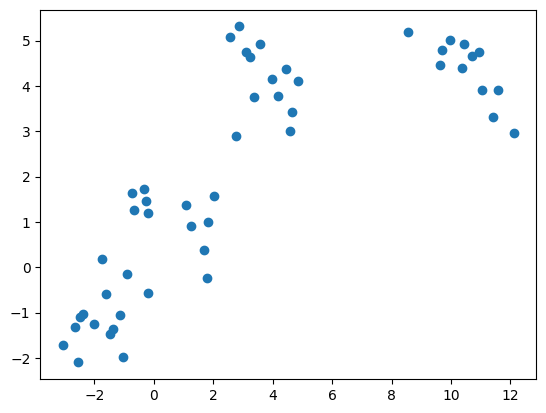

In [15]:
plt.scatter(X[:, 0], X[:, 1], marker='o')


Code diatas digunakan untuk memvisualisasikan dataset yang telah dibuat sebelumnya dalam bentuk scatter plot. Fungsi plt.scatter dari matplotlib digunakan untuk menggambar titik-titik pada plot, dengan X[:, 0] dan X[:, 1] merujuk pada kolom pertama dan kedua dari array X yang berisi koordinat data. Dengan kata lain, X[:, 0] adalah sumbu-x (koordinat horizontal), dan X[:, 1] adalah sumbu-y (koordinat vertikal) untuk setiap titik. Parameter marker='o' menentukan bentuk titik yang akan digambar, dalam hal ini berbentuk lingkaran. Plot ini memungkinkan kita untuk melihat distribusi dan pemisahan antar cluster yang telah dibuat menggunakan make_blobs.

Hasil dari kode plt.scatter(X[:, 0], X[:, 1], marker='o') menunjukkan visualisasi sebaran data dalam bentuk diagram pencar (scatter plot). Titik-titik biru yang terlihat pada grafik merepresentasikan nilai-nilai dari dua variabel dalam dataset yang diberikan. Dari grafik ini, terlihat bahwa data tidak terdistribusi secara merata; terdapat dua kelompok utama titik yang terpisah, satu kelompok berada di bagian kiri bawah dan satu lagi di bagian kanan atas. Hal ini menunjukkan adanya potensi struktur kluster dalam data, yang dapat dianalisis lebih lanjut menggunakan teknik clustering untuk memahami pola dan hubungan antar data.

AGGLOMERATIVE CLUSTERING

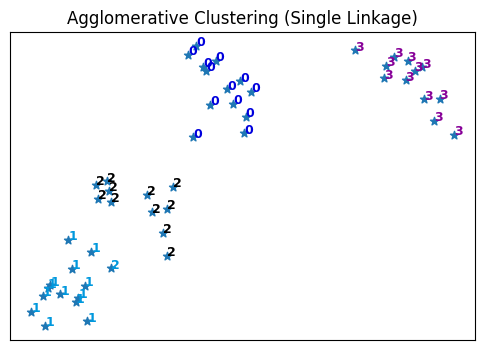

In [16]:
# Agglomerative Clustering dengan single linkage
agglom_single = AgglomerativeClustering(n_clusters=4, linkage='single')
y_single = agglom_single.fit_predict(X)

# Visualisasi hasil clustering (single linkage)
plt.figure(figsize=(6, 4))
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
X_scaled = (X - x_min) / (x_max - x_min)

# Menampilkan data titik
for i in range(X_scaled.shape[0]):
    plt.text(X_scaled[i, 0], X_scaled[i, 1], str(y[i]),
             color=plt.cm.nipy_spectral(agglom_single.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='*')
plt.title('Agglomerative Clustering (Single Linkage)')
plt.show()


Kode diatas melakukan Agglomerative Clustering pada data yang telah dibuat sebelumnya dan memvisualisasikan hasil clustering. Pertama, model clustering dibuat menggunakan metode single linkage dengan 4 cluster yang ditentukan (n_clusters=4). Setelah itu, model dilatih menggunakan data X dan label y (meskipun y tidak digunakan dalam proses clustering karena ini adalah metode unsupervised). Data kemudian diskalakan agar lebih mudah divisualisasikan, dengan menghitung nilai minimum dan maksimum untuk setiap dimensi pada data X, lalu menormalkannya sehingga titik-titik data berada dalam rentang yang lebih kecil. Selanjutnya, setiap titik diberi label cluster dan diwarnai sesuai dengan cluster hasil prediksi model menggunakan agglom.labels_. Hasil clustering kemudian divisualisasikan dengan menggunakan scatter plot di mana titik-titik data digambarkan menggunakan simbol bintang (marker='*'), dan cluster yang berbeda diberi warna yang berbeda.

Hasil dari kode yang menggunakan AgglomerativeClustering dengan linkage='single' dan n_clusters=4 menunjukkan visualisasi hasil clustering pada dataset. Dalam grafik ini, setiap titik yang terdistribusi di ruang dua dimensi diwakili oleh simbol bintang, dan angka yang tertera di samping setiap titik menunjukkan label kluster yang ditetapkan oleh algoritma.

Dari visualisasi, terlihat bahwa data telah dikelompokkan menjadi empat kluster yang berbeda, dengan beberapa titik yang lebih dekat satu sama lain dibandingkan dengan titik dari kluster lain. Warna teks yang berbeda menunjukkan kluster yang berbeda, memberikan gambaran yang jelas tentang bagaimana data terdistribusi dan terkelompok. Kluster 0 dan 1 tampak lebih padat, sementara kluster 2 dan 3 lebih tersebar. Ini menunjukkan bahwa metode single linkage berhasil mengidentifikasi struktur dalam data, meskipun ada beberapa tumpang tindih antar kluster. Visualisasi ini membantu dalam memahami bagaimana data terorganisir dan dapat menjadi dasar untuk analisis lebih lanjut.

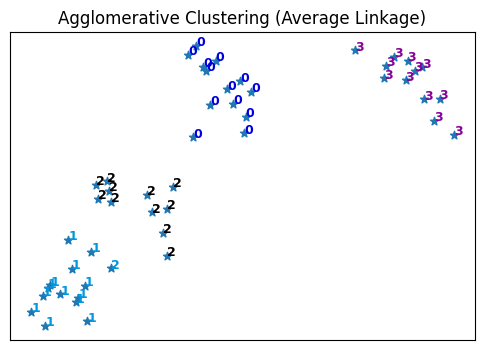

In [17]:
# Agglomerative Clustering dengan average linkage
agglom_average = AgglomerativeClustering(n_clusters=4, linkage='average')
y_average = agglom_average.fit_predict(X)

# Visualisasi hasil clustering (average linkage)
plt.figure(figsize=(6, 4))
X_scaled = (X - x_min) / (x_max - x_min)

# Menampilkan data titik
for i in range(X_scaled.shape[0]):
    plt.text(X_scaled[i, 0], X_scaled[i, 1], str(y[i]),
             color=plt.cm.nipy_spectral(agglom_average.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='*')
plt.title('Agglomerative Clustering (Average Linkage)')
plt.show()


Kode diatas melakukan Agglomerative Clustering menggunakan metode average linkage untuk dataset X. Pertama, model AgglomerativeClustering dengan parameter n_clusters=4 dan linkage='average' dibuat untuk membagi data ke dalam 4 cluster menggunakan metode average linkage, di mana jarak antar cluster dihitung berdasarkan rata-rata jarak antara semua titik dalam dua cluster yang digabungkan. Hasil clustering disimpan dalam y_average. Selanjutnya, data X diskalakan agar semua titik berada dalam rentang yang seragam dengan cara mengurangi nilai terkecil dan membaginya dengan rentang maksimum-minimum. Setelah itu, untuk setiap titik, ditampilkan label cluster yang sesuai pada plot menggunakan plt.text dengan pewarnaan yang mencerminkan cluster masing-masing. Visualisasi akhir menggunakan plt.scatter menampilkan hasil clustering, dengan data yang sudah diskalakan, dan menggunakan simbol * untuk menandai titik-titik data, sementara sumbu x dan y dihilangkan untuk memperjelas tampilan cluster. Plot yang dihasilkan menunjukkan distribusi cluster berdasarkan average linkage.

Hasil dari kode yang menggunakan AgglomerativeClustering dengan metode average linkage dan n_clusters=4 menunjukkan visualisasi hasil clustering pada dataset. Dalam grafik ini, setiap titik yang terdistribusi di ruang dua dimensi diwakili oleh simbol bintang, dan angka yang tertera di samping setiap titik menunjukkan label kluster yang ditetapkan oleh algoritma.

Dari visualisasi, terlihat bahwa data telah dikelompokkan menjadi empat kluster yang berbeda, dengan warna teks yang berbeda menunjukkan kluster yang berbeda. Kluster 0 dan 1 tampak lebih padat dan terpisah dari kluster 2 dan 3, yang lebih tersebar. Metode average linkage cenderung menghasilkan kluster yang lebih seimbang dibandingkan dengan single linkage, dengan batas kluster yang lebih jelas. Hal ini menunjukkan bahwa average linkage lebih efektif dalam menangani data yang memiliki variasi dalam jarak antar titik, sehingga memberikan gambaran yang lebih baik tentang struktur data. Visualisasi ini membantu dalam memahami bagaimana data terorganisir dan dapat menjadi dasar untuk analisis lebih lanjut.

In [18]:
from scipy.spatial import distance_matrix

# Calculate the distance matrix
dist_matrix = distance_matrix(X, X)
print(dist_matrix)


[[ 0.          0.6718999   0.83967961 ... 10.01958751  1.18280432
  11.5955731 ]
 [ 0.6718999   0.          1.48230524 ... 10.16069023  1.85470295
  11.84290832]
 [ 0.83967961  1.48230524  0.         ...  9.5883916   0.52334796
  11.04231482]
 ...
 [10.01958751 10.16069023  9.5883916  ...  0.          9.88078513
   2.42559934]
 [ 1.18280432  1.85470295  0.52334796 ...  9.88078513  0.
  11.24759912]
 [11.5955731  11.84290832 11.04231482 ...  2.42559934 11.24759912
   0.        ]]


Kode ini menghitung matriks jarak antar semua pasangan titik dalam dataset menggunakan fungsi distance_matrix dari scipy.spatial. Matriks jarak tersebut berisi jarak Euclidean antara setiap titik dalam dataset X. Setiap elemen [i, j] dalam matriks ini menunjukkan jarak antara titik i dan titik j. Matriks ini sangat berguna dalam algoritma clustering seperti Agglomerative Clustering, di mana jarak antar titik digunakan untuk menggabungkan titik-titik yang paling dekat. Hasil dari matriks ini kemudian dicetak untuk menunjukkan hubungan jarak antara titik-titik dalam data yang akan dianalisis lebih lanjut.


Hasil matriks jarak yang ditampilkan di atas menunjukkan jarak Euclidean antara setiap pasangan titik dalam dataset. Matriks ini bersifat simetris, yang berarti elemen di posisi [i, j] memiliki nilai yang sama dengan elemen di posisi [j, i]. Misalnya, jarak antara titik pertama dan titik kedua adalah 13.102, dan jarak antara titik kedua dan titik pertama juga 13.102. Di diagonal utama, jarak dari setiap titik ke dirinya sendiri adalah 0, seperti yang terlihat pada elemen-elemen diagonal. Angka-angka lainnya menunjukkan seberapa jauh titik-titik tersebut satu sama lain dalam ruang dua dimensi. Matriks ini memberikan informasi yang sangat penting untuk algoritma clustering, karena digunakan untuk mengukur kedekatan antara titik-titik dan mengelompokkan titik-titik yang lebih dekat satu sama lain.

In [19]:
X = hierarchy.linkage(dist_matrix, 'single')
Y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-19-7e9a5415d43d>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-19-7e9a5415d43d>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')



Kode tersebut menggunakan fungsi linkage dari scipy.cluster.hierarchy untuk melakukan hierarchical clustering dengan dua metode linkage berbeda: single, dan average. Single linkage menggabungkan cluster berdasarkan jarak terdekat antar titik, yang cenderung menghasilkan cluster yang lebih memanjang dan sensitif terhadap outliers. Sementara average linkage menggabungkan cluster berdasarkan rata-rata jarak antar titik, memberikan hasil yang lebih stabil dan seimbang. Kedua metode ini menghasilkan matriks linkage yang menggambarkan urutan dan cara cluster digabungkan, yang digunakan untuk membentuk dendrogram dan menganalisis struktur data.

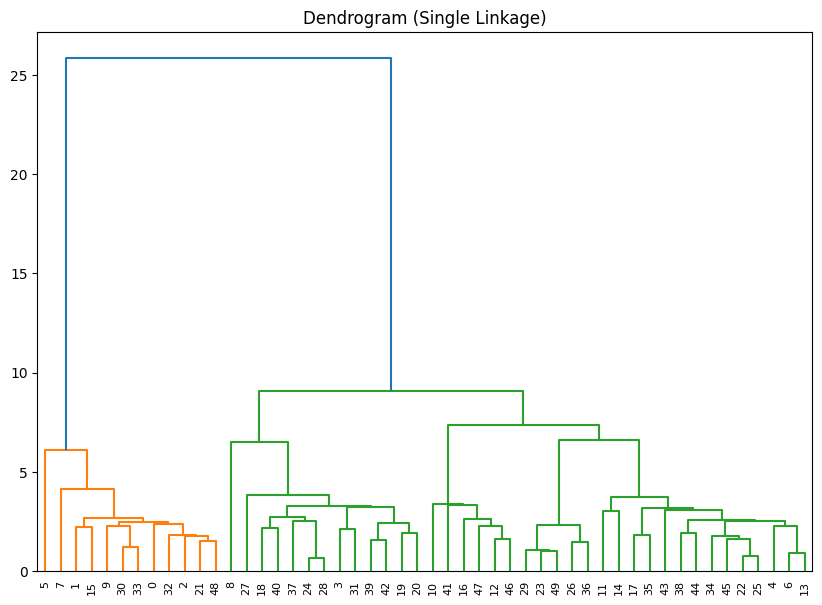

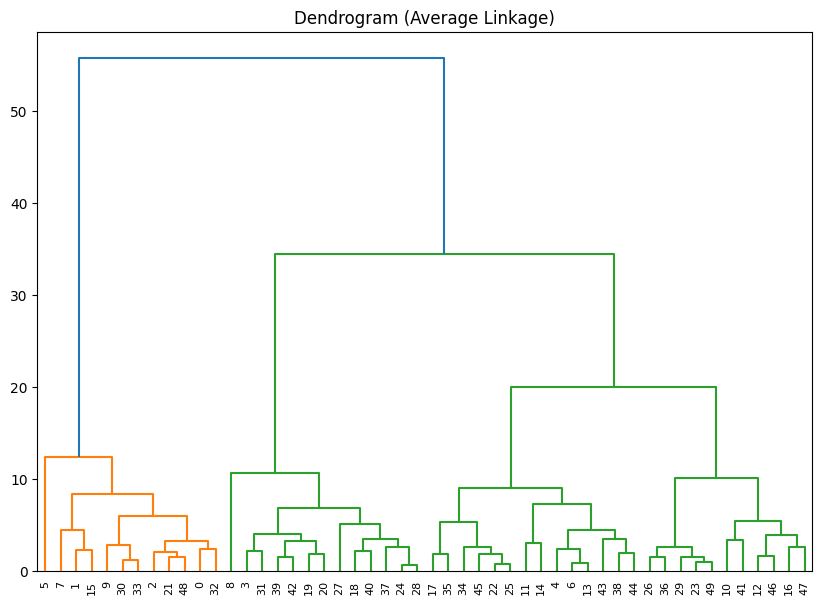

In [20]:
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy


plt.figure(figsize=(10, 7))
plt.title('Dendrogram (Single Linkage)')
hierarchy.dendrogram(X)
plt.show()

plt.figure(figsize=(10, 7))
plt.title('Dendrogram (Average Linkage)')
hierarchy.dendrogram(Y)
plt.show()



Kode diatas menghasilkan dendrogram untuk visualisasi hasil hierarchical clustering menggunakan dua metode linkage, yaitu single linkage dan average linkage. Fungsi hierarchy.dendrogram(X) dan hierarchy.dendrogram(Y) digunakan untuk menggambar dendrogram berdasarkan matriks linkage yang telah dihitung sebelumnya menggunakan metode single linkage (X) dan average linkage (Y). Dendrogram ini menggambarkan urutan penggabungan cluster dan menunjukkan jarak antar cluster yang digabungkan pada setiap langkah. Plot pertama menampilkan dendrogram untuk single linkage, yang cenderung menunjukkan cabang panjang, sementara plot kedua menampilkan dendrogram untuk average linkage, yang menghasilkan cabang yang lebih seimbang. Kedua dendrogram ini membantu menganalisis bagaimana data dikelompokkan pada berbagai tingkat kedekatan antar titik.

Dua gambar yang dihasilkan dari kode di atas menunjukkan dendrogram untuk metode clustering agglomeratif dengan single linkage dan average linkage.

Dendrogram pertama, yang menggunakan single linkage, menunjukkan bagaimana titik data dikelompokkan berdasarkan jarak terdekat antar titik. Dalam dendrogram ini, penggabungan kluster terjadi pada jarak yang lebih kecil, yang dapat menyebabkan beberapa kluster menjadi lebih panjang dan ramping. Hal ini mencerminkan kecenderungan single linkage untuk menggabungkan titik-titik yang berdekatan, meskipun mereka mungkin tidak memiliki kesamaan yang kuat, sehingga dapat menghasilkan kluster yang lebih terfragmentasi.

Sebaliknya, dendrogram kedua yang menggunakan average linkage menunjukkan penggabungan kluster dengan mempertimbangkan rata-rata jarak antar titik dalam kluster. Dendrogram ini cenderung menghasilkan kluster yang lebih seimbang dan terpisah dengan jelas, karena average linkage mengurangi pengaruh dari titik-titik yang sangat dekat. Ini terlihat dari struktur kluster yang lebih kompak dan terorganisir, yang menunjukkan bahwa average linkage lebih efektif dalam menangani data dengan variasi jarak antar titik. Secara keseluruhan, kedua dendrogram ini memberikan wawasan yang berbeda tentang bagaimana data dapat dikelompokkan, tergantung pada metode linkage yang digunakan.

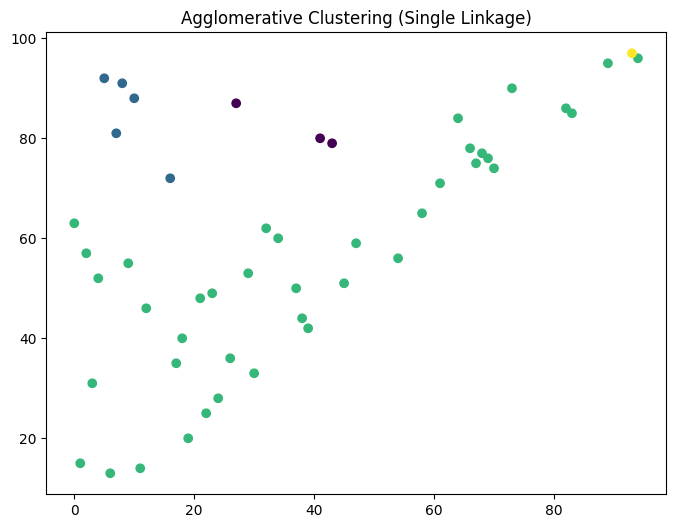

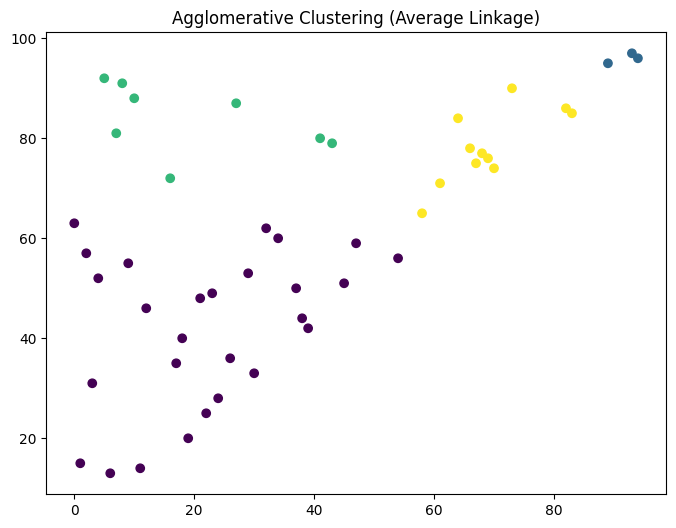

In [21]:
# Agglomerative Clustering menggunakan single linkage dan average linkage
agg_single = AgglomerativeClustering(n_clusters=4, linkage='single')
y_single = agg_single.fit_predict(X)

agg_average = AgglomerativeClustering(n_clusters=4, linkage='average')
y_average = agg_average.fit_predict(X)

# Visualisasi hasil clustering untuk single linkage
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_single, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering (Single Linkage)')
plt.show()

# Visualisasi hasil clustering untuk average linkage
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_average, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering (Average Linkage)')
plt.show()

Kode diatas melakukan Agglomerative Clustering dengan dua metode linkage yang berbeda, yaitu single linkage dan average linkage. Pertama, model AgglomerativeClustering dibuat dengan parameter n_clusters=4 untuk membagi data menjadi 4 cluster, dan parameter linkage='single' untuk clustering menggunakan single linkage, yang kemudian di-fit ke data X. Hasil prediksi cluster disimpan dalam y_single. Proses yang sama dilakukan untuk average linkage, di mana model clustering diubah menjadi linkage='average', dan hasil prediksinya disimpan dalam y_average.

Setelah clustering selesai, kode ini melanjutkan dengan memvisualisasikan hasilnya. Visualisasi pertama menampilkan scatter plot untuk single linkage, di mana titik data diberi warna sesuai dengan cluster yang terbentuk (menggunakan c=y_single dengan colormap viridis). Visualisasi kedua menampilkan scatter plot untuk average linkage, dengan cara yang sama menggunakan c=y_average. Kedua plot ini memperlihatkan bagaimana data dikelompokkan menjadi 4 cluster yang berbeda, dengan perbedaan distribusi dan bentuk cluster yang dihasilkan oleh masing-masing metode linkage.

Dua gambar yang dihasilkan dari kode di atas menunjukkan hasil clustering agglomeratif menggunakan metode single linkage dan average linkage pada dataset yang sama.

Pada grafik pertama, yang menggunakan single linkage, terlihat bahwa data dikelompokkan menjadi empat kluster, dengan beberapa titik yang sangat dekat satu sama lain. Metode ini cenderung menghasilkan kluster yang lebih panjang dan terfragmentasi, di mana beberapa titik dari kluster yang berbeda mungkin saling berdekatan, menciptakan batas yang kurang jelas antara kluster. Hal ini dapat dilihat dari adanya satu kluster yang terpisah di bagian kiri bawah dan kluster lainnya yang lebih tersebar di bagian kanan atas.

Sebaliknya, grafik kedua yang menggunakan average linkage menunjukkan hasil clustering yang lebih seimbang dan terpisah dengan jelas. Kluster-kluster yang terbentuk lebih kompak, dan batas antar kluster lebih jelas, mencerminkan kemampuan average linkage untuk mempertimbangkan jarak rata-rata antar titik dalam kluster. Ini menghasilkan pengelompokan yang lebih terorganisir, di mana setiap kluster memiliki area yang lebih terdefinisi. Secara keseluruhan, perbandingan kedua grafik ini menunjukkan bagaimana metode linkage yang berbeda dapat mempengaruhi hasil clustering dan struktur data yang dihasilkan.

Perbedaan antara single linkage dan average linkage
1. Single Linkage
Definisi: Jarak antara dua cluster dihitung berdasarkan jarak terdekat antara satu titik di masing-masing cluster.
Karakteristik: Menggabungkan cluster dengan jarak terkecil antara titik-titiknya. Cluster akan bergabung cepat jika ada sedikit titik yang sangat dekat.
Efek:
Cenderung menghasilkan struktur rantai atau long-chain, di mana cluster yang jauh bisa bergabung hanya karena ada satu titik yang sangat dekat.
Sensitif terhadap outliers karena satu titik yang jauh bisa mempengaruhi penggabungan cluster.
Dendrogram akan cenderung memiliki cabang yang panjang dan lurus.
2. Average Linkage
Definisi: Jarak antara dua cluster dihitung berdasarkan rata-rata jarak antara semua pasangan titik dari kedua cluster.
Karakteristik: Menggabungkan cluster dengan rata-rata jarak antar titik-titiknya, menghasilkan penggabungan yang lebih seimbang dan stabil.
Efek:
Cenderung menghasilkan cluster yang lebih kompak dan seimbang, karena rata-rata jarak dipertimbangkan, bukan hanya jarak antar titik yang terdekat.
Lebih robust terhadap outliers, karena penggabungan tidak hanya bergantung pada satu titik yang sangat dekat.
Dendrogramnya lebih simetris dan memiliki cabang yang lebih pendek.

Perbedaan Utama:
Single Linkage menggabungkan cluster berdasarkan titik yang paling dekat antar cluster, seringkali menyebabkan cluster berbentuk rantai dan lebih rentan terhadap outliers.
Average Linkage menggabungkan cluster berdasarkan rata-rata jarak antara semua titik, menghasilkan cluster yang lebih stabil dan seimbang.

Dengan kata lain, single linkage lebih cepat dan cenderung menghasilkan cluster yang lebih terpisah dan lebih longgar, sementara average linkage memberikan hasil yang lebih kompak dan lebih alami, serta lebih stabil terhadap gangguan dari data yang tidak biasa.

2). Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage dan average linkage untuk dataset cars_clustering! Jelaskan perbedaannya!

In [22]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [23]:
# Read Data
pdf = pd.read_csv('cars_clus.csv')
print("Shape of dataset: ", pdf.shape)
pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0



Pada langkah pertama, dataset cars_clus.csv dibaca menggunakan pd.read_csv dan disimpan dalam variabel pdf sebagai DataFrame. Dengan menggunakan print(pdf.shape), kita mencetak ukuran dataset (jumlah baris dan kolom) untuk memahami struktur data. Kemudian, pdf.head(5) menampilkan 5 baris pertama dari dataset untuk memberikan gambaran awal mengenai data yang ada, termasuk nama kolom dan nilai yang terkandung di dalamnya. Langkah ini penting untuk memahami data yang akan dianalisis dan memastikan bahwa file CSV telah berhasil dimuat dengan benar.

In [24]:
# Data Cleaning - Remove rows with null values
print("Shape of dataset before cleaning: ", pdf.size)
pdf[['sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
     'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
                               'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
                               'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0



Pada langkah ini, dilakukan proses data cleaning untuk memastikan bahwa data yang digunakan dalam analisis tidak mengandung nilai yang hilang (null). Pertama, print(pdf.size) digunakan untuk menampilkan ukuran dataset sebelum pembersihan, yang mencakup jumlah elemen dalam DataFrame. Kemudian, kolom-kolom yang berisi data numerik dipilih (misalnya sales, resale, price, dll.) dan dikonversi menjadi tipe numerik menggunakan apply(pd.to_numeric, errors='coerce'). Parameter errors='coerce' memastikan bahwa nilai-nilai yang tidak dapat dikonversi menjadi numerik akan menjadi NaN. Setelah itu, pdf.dropna() digunakan untuk menghapus semua baris yang memiliki nilai NaN (missing values). Setelah pembersihan, indeks DataFrame di-reset menggunakan pdf.reset_index(drop=True), yang memastikan indeks baru diatur ulang tanpa menyimpan indeks lama. Terakhir, print(pdf.size) menampilkan ukuran dataset setelah pembersihan untuk memverifikasi perubahan dan pdf.head(5) menampilkan 5 baris pertama dataset yang telah dibersihkan. Langkah ini penting untuk memastikan bahwa analisis yang dilakukan menggunakan data yang lengkap dan bersih dari missing values.

In [25]:
# Feature Selection
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

Pada langkah ini, dilakukan feature selection untuk memilih variabel-variabel yang relevan yang akan digunakan dalam proses clustering. Kolom-kolom yang dipilih adalah variabel yang diharapkan memiliki pengaruh signifikan terhadap analisis, seperti engine_s (ukuran mesin), horsepow (daya kuda), wheelbas (jarak sumbu roda), width (lebar), length (panjang), curb_wgt (berat kosong), fuel_cap (kapasitas bahan bakar), dan mpg (miles per gallon). Dengan memilih subset kolom ini, kita hanya fokus pada fitur-fitur yang mengandung informasi penting dan relevan untuk clustering kendaraan, mengurangi kemungkinan noise dari variabel lainnya yang tidak dibutuhkan. pdf[['engine_s', 'horsepow', ...]] digunakan untuk mengekstrak kolom-kolom yang telah dipilih tersebut dan menyimpannya dalam variabel featureset yang kemudian akan digunakan untuk langkah-langkah analisis selanjutnya.

In [26]:
# Normalization
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

Pada langkah ini, dilakukan normalization terhadap data fitur yang telah dipilih sebelumnya. Proses normalisasi bertujuan untuk mengubah skala fitur-fitur yang ada agar berada dalam rentang yang seragam, biasanya antara 0 dan 1. Hal ini penting karena algoritma clustering seperti Agglomerative Clustering dan metode jarak lainnya (seperti Euclidean distance) sensitif terhadap perbedaan skala antar fitur. Tanpa normalisasi, fitur dengan nilai numerik yang lebih besar (misalnya, panjang mobil atau berat) bisa mendominasi perhitungan jarak, sementara fitur dengan skala lebih kecil (seperti konsumsi bahan bakar) mungkin kurang diperhitungkan.

Untuk melakukan normalisasi, digunakan objek MinMaxScaler dari sklearn.preprocessing, yang mengubah setiap nilai fitur agar berada dalam rentang antara 0 dan 1. min_max_scaler.fit_transform(x) diterapkan pada featureset untuk menghasilkan matriks fitur yang sudah dinormalisasi. Sebagai contoh, hasil dari normalisasi untuk lima baris pertama (ditampilkan sebagai feature_mtx[0:5]) menunjukkan bahwa nilai-nilai fitur untuk setiap kendaraan berada dalam rentang 0 dan 1. Sebagai contoh, nilai pertama untuk kolom engine_s pada baris pertama yang sebelumnya lebih besar, kini berada pada rentang antara 0 dan 1 (0.11428571).

SPICY

In [27]:
# Clustering with Scipy
import numpy as np  # Import numpy as np
import scipy.spatial

leng = feature_mtx.shape[0]
D = np.zeros([leng, leng])  # Use np.zeros instead of scipy.zeros

for i in range(leng):
    for j in range(leng):
        D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])


Pada langkah ini, dilakukan perhitungan matriks jarak menggunakan Euclidean distance untuk mengukur jarak antara setiap pasangan titik data dalam dataset. Matriks jarak ini disimpan dalam variabel D, yang memiliki ukuran leng x leng, di mana leng adalah jumlah sampel dalam dataset. Dengan menggunakan dua loop for, jarak antara setiap pasangan titik dihitung dan disimpan dalam matriks. Fungsi scipy.spatial.distance.euclidean digunakan untuk menghitung jarak antara dua titik data berdasarkan fitur-fitur yang telah dinormalisasi. Matriks ini kemudian akan digunakan dalam langkah clustering hierarkis selanjutnya dengan SciPy.

In [28]:
# Clustering with SciPy (Single Linkage)
Z_single = hierarchy.linkage(D, method='single')  # Single linkage

# Clustering with SciPy (Average Linkage)
Z_average = hierarchy.linkage(D, method='average')  # Average linkage


<ipython-input-28-24ad2aabd7b4>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = hierarchy.linkage(D, method='single')  # Single linkage
<ipython-input-28-24ad2aabd7b4>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_average = hierarchy.linkage(D, method='average')  # Average linkage


Pada langkah ini, dilakukan clustering hierarkis menggunakan metode Single Linkage dan Average Linkage dengan fungsi hierarchy.linkage dari SciPy. Metode Single Linkage menghitung jarak antar cluster berdasarkan jarak terdekat antara anggota cluster, sedangkan Average Linkage menggunakan rata-rata jarak antara semua pasangan titik dari dua cluster. Hasilnya disimpan dalam variabel Z_single dan Z_average untuk masing-masing metode, yang nantinya digunakan untuk membuat dendrogram dan menganalisis pembentukan cluster.

In [29]:
from scipy.cluster.hierarchy import fcluster

k = 5  # Misalnya Anda ingin 5 cluster
clusters_single = fcluster(Z_single, k, criterion='maxclust')  # Single Linkage
clusters_average = fcluster(Z_average, k, criterion='maxclust')  # Average Linkage


Pada kode ini, fungsi fcluster dari scipy.cluster.hierarchy digunakan untuk membagi hasil hierarchical clustering menjadi sejumlah cluster yang telah ditentukan. Parameter k = 5 menunjukkan bahwa kita ingin membagi data ke dalam 5 cluster. Fungsi ini memerlukan dua input utama: hasil linkage (Z_single atau Z_average) dan jumlah cluster yang diinginkan (k). Dalam konteks ini, fcluster digunakan dengan single linkage dan average linkage untuk masing-masing hasil clustering. Dengan menggunakan kriteria 'maxclust', fungsi ini membentuk cluster sebanyak k berdasarkan jumlah cluster yang ditentukan, sehingga menghasilkan variabel clusters_single dan clusters_average, yang masing-masing berisi label cluster untuk setiap titik data berdasarkan metode single dan average linkage.

In [30]:
max_d = 3  # Misalnya jarak maksimal antara dua cluster adalah 3
clusters_single_distance = fcluster(Z_single, max_d, criterion='distance')  # Single Linkage
clusters_average_distance = fcluster(Z_average, max_d, criterion='distance')  # Average Linkage


Pada kode ini, fungsi fcluster digunakan untuk membentuk cluster berdasarkan jarak maksimum antara dua cluster. Parameter max_d = 3 menunjukkan bahwa dua cluster hanya akan digabung jika jarak antara keduanya lebih kecil dari atau sama dengan 3. Dengan menggunakan kriteria 'distance', fungsi ini menghasilkan cluster berdasarkan jarak antar cluster yang tercatat dalam hasil linkage (Z_single dan Z_average). Dalam konteks ini, fcluster diterapkan untuk metode single linkage dan average linkage, menghasilkan dua set cluster terpisah: clusters_single_distance dan clusters_average_distance. Masing-masing berisi label cluster yang mengelompokkan data berdasarkan jarak antar cluster, dengan jarak maksimum yang ditentukan adalah 3.

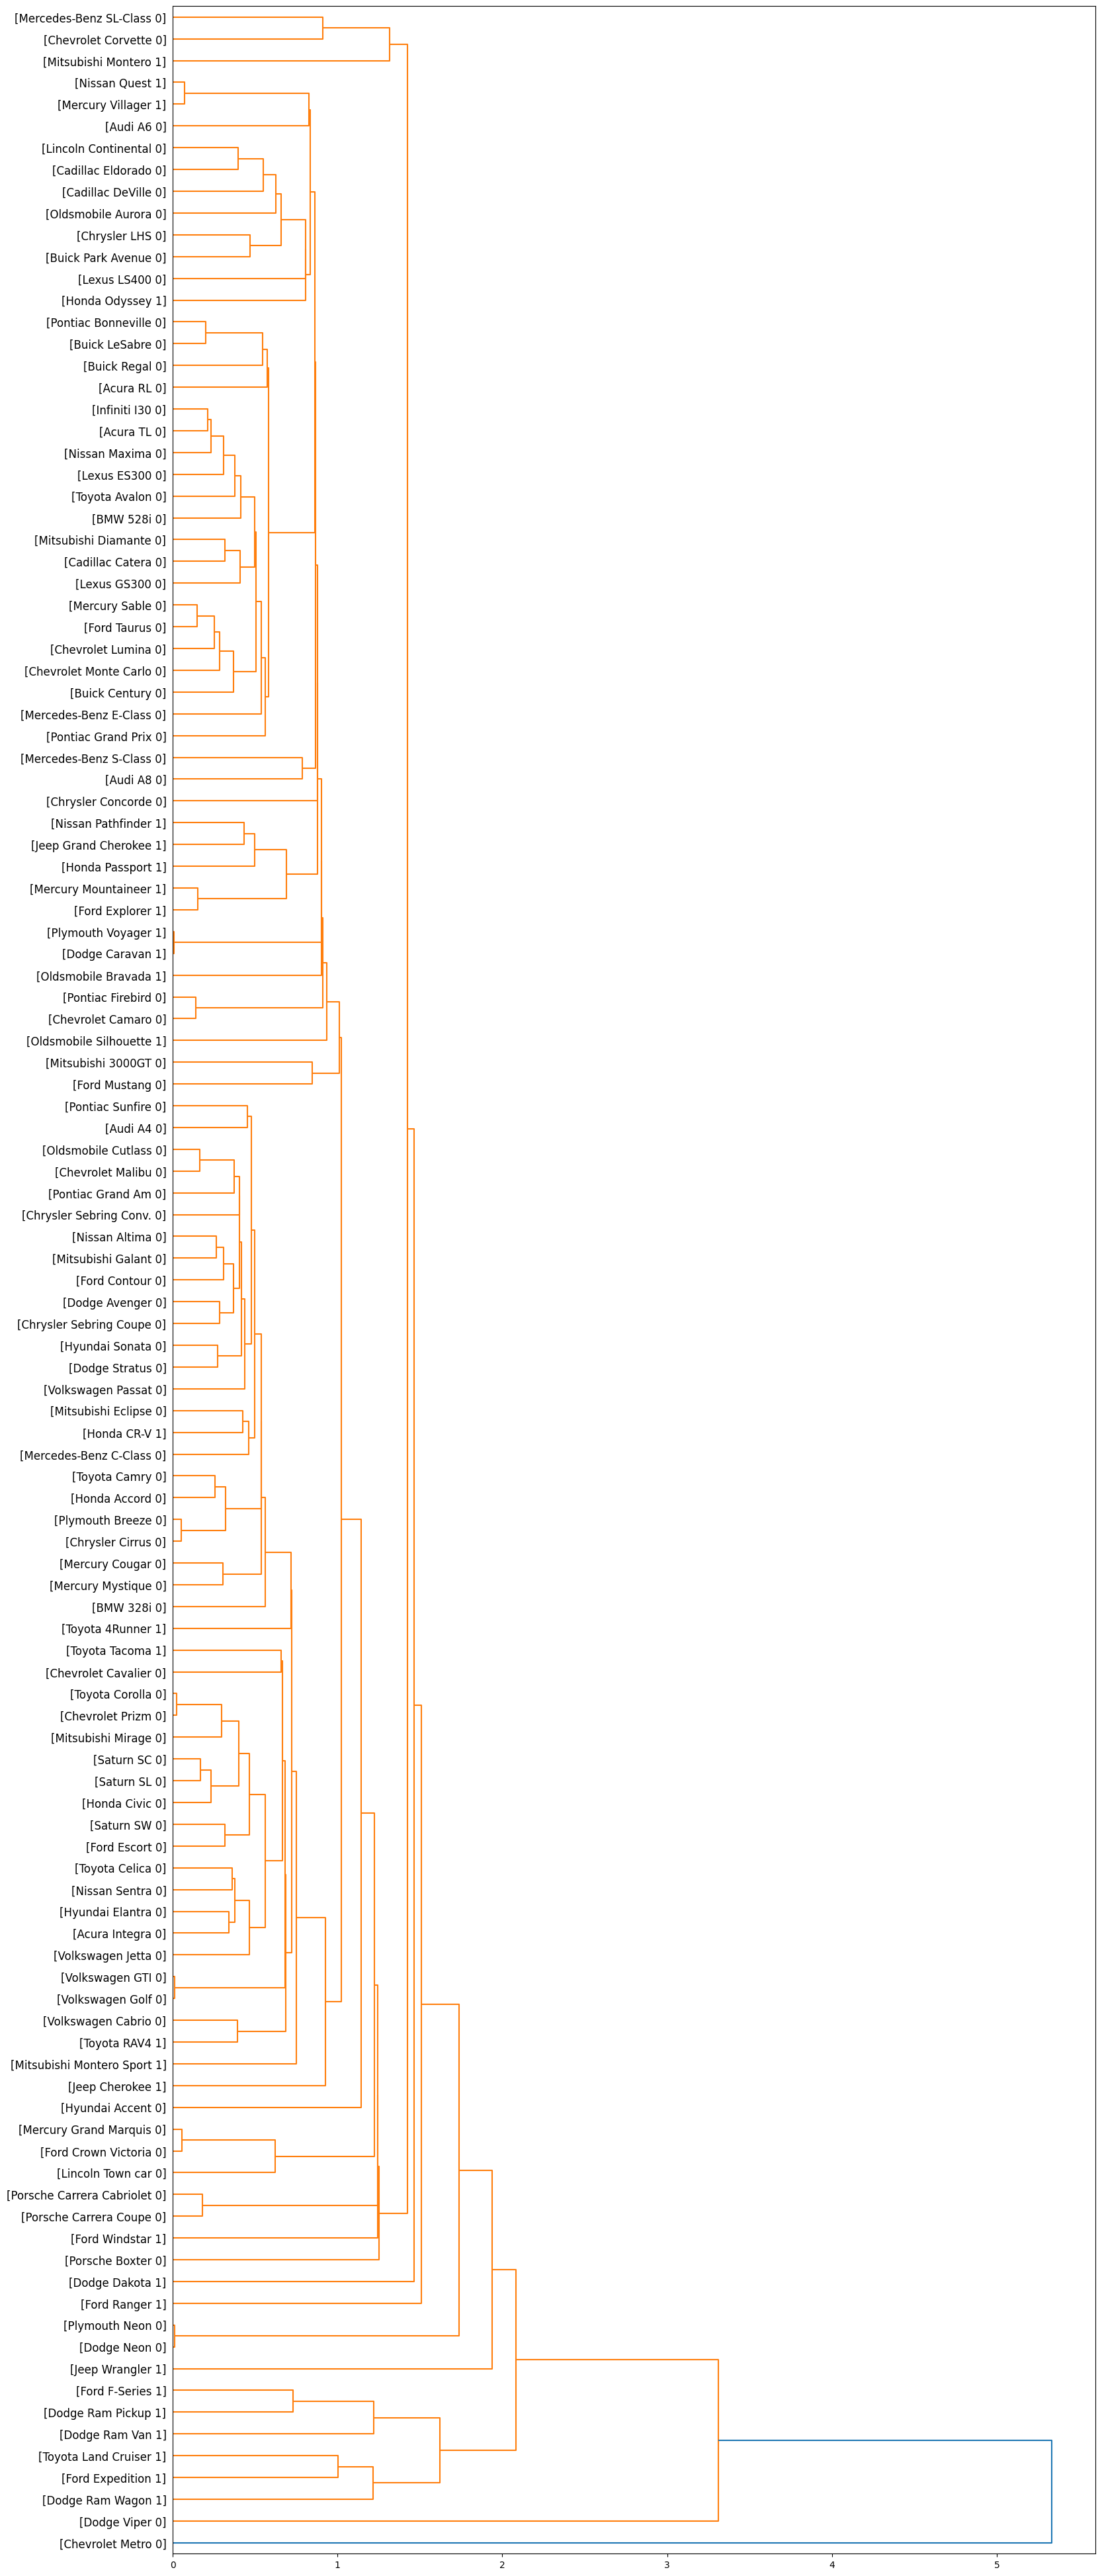

In [31]:
import pylab
from scipy.cluster.hierarchy import dendrogram

fig = pylab.figure(figsize=(18, 50))
def llf_single(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))

dendro_single = dendrogram(Z_single, leaf_label_func=llf_single, leaf_rotation=0, leaf_font_size=12, orientation='right')



Kode diatas digunakan untuk membuat dan menampilkan dendrogram hasil dari agglomerative clustering dengan metode single linkage. Pertama, kode mengimpor modul pylab dan dendrogram dari scipy.cluster.hierarchy. Kemudian, dibuat objek fig yang menyetel ukuran gambar (figsize) dari dendrogram yang akan dihasilkan. Fungsi llf_single disiapkan untuk menampilkan label khusus pada setiap cabang dendrogram. Fungsi ini mengambil ID elemen dan mengembalikan string yang mencakup informasi seperti manufacturer, model, dan type mobil yang relevan dengan ID tersebut. Fungsi ini digunakan untuk memberi label yang lebih informatif pada setiap daun di dendrogram. Selanjutnya, fungsi dendrogram dipanggil dengan parameter Z_single yang berisi hasil dari hierarki single linkage, serta beberapa pengaturan visual seperti leaf_rotation untuk memutar label daun, leaf_font_size untuk ukuran font label, dan orientation='right' yang mengatur orientasi dendrogram ke arah horizontal (ke kanan). Dendrogram ini memberikan gambaran visual tentang bagaimana data dikelompokkan dengan metode single linkage berdasarkan kedekatannya.

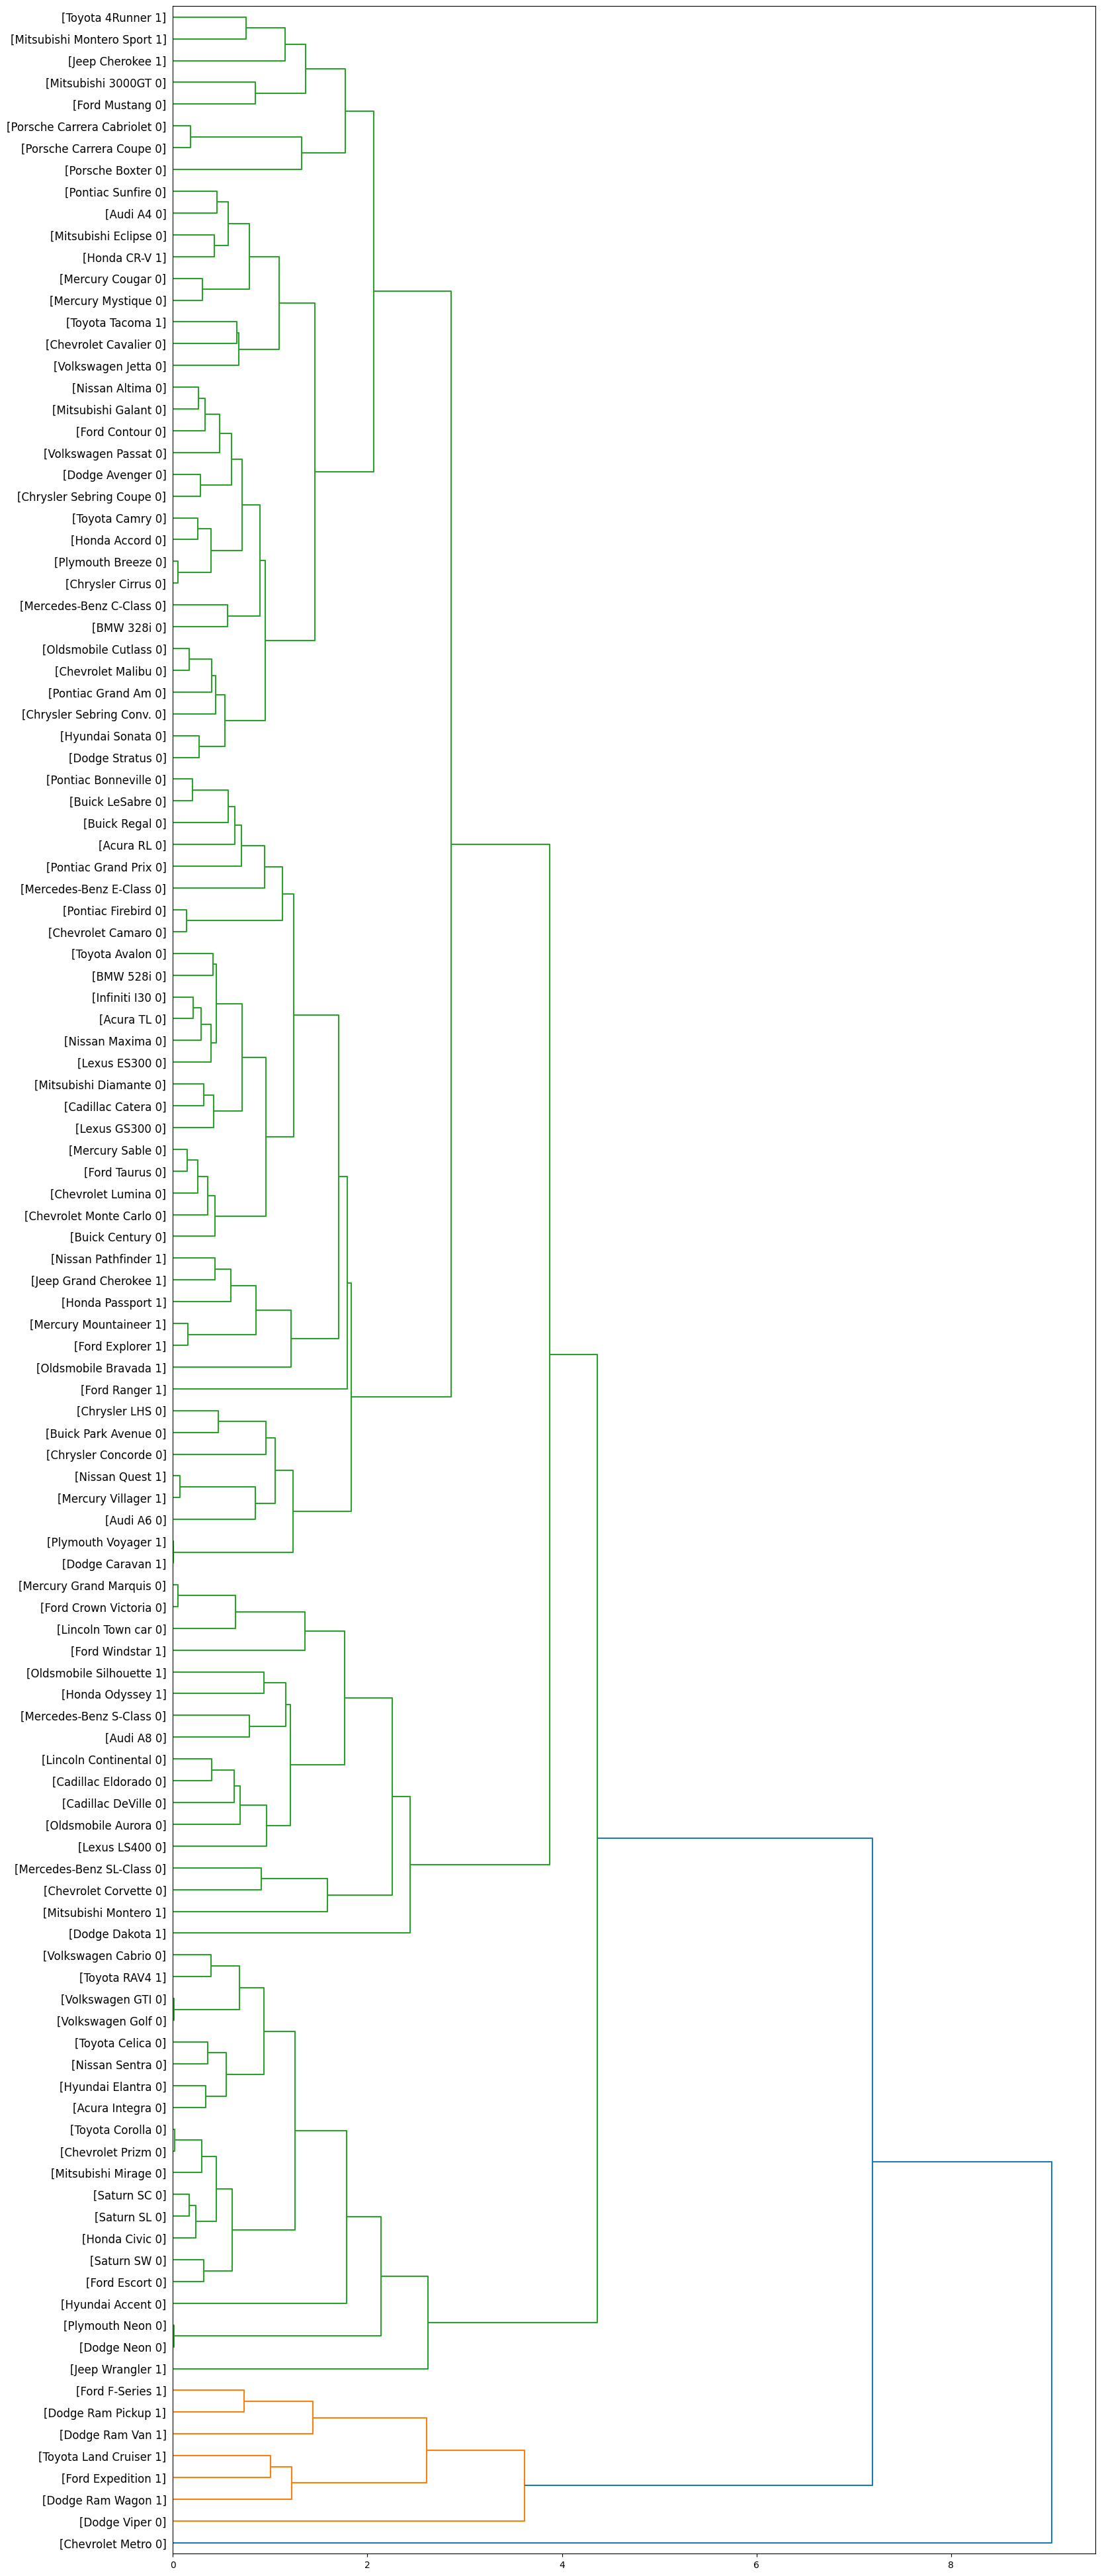

In [32]:
# Dendrogram untuk Average Linkage
fig = pylab.figure(figsize=(18, 50))
def llf_average(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))

dendro_average = dendrogram(Z_average, leaf_label_func=llf_average, leaf_rotation=0, leaf_font_size=12, orientation='right')


Kode ini menghasilkan dendrogram untuk hasil clustering menggunakan metode average linkage. Pertama, kode mengimpor modul pylab dan fungsi dendrogram dari scipy.cluster.hierarchy. Objek fig digunakan untuk mengatur ukuran gambar dendrogram (figsize), dengan ukuran yang cukup besar agar informasi lebih jelas. Fungsi llf_average disiapkan untuk memberi label yang informatif pada setiap daun dendrogram, dengan menyertakan informasi mengenai manufacturer, model, dan type mobil yang relevan dengan ID yang diberikan. Fungsi ini kemudian digunakan dalam parameter leaf_label_func pada fungsi dendrogram. Proses selanjutnya adalah pemanggilan fungsi dendrogram dengan data Z_average yang berisi hasil clustering menggunakan metode average linkage. Beberapa pengaturan visual lainnya termasuk leaf_rotation=0 untuk memastikan label daun tetap tegak, leaf_font_size=12 untuk ukuran font label, dan orientation='right' untuk mengatur orientasi dendrogram secara horizontal ke kanan. Dendrogram ini memberikan gambaran visual tentang bagaimana data dikelompokkan berdasarkan average linkage yang menggambarkan kedekatan antar data.

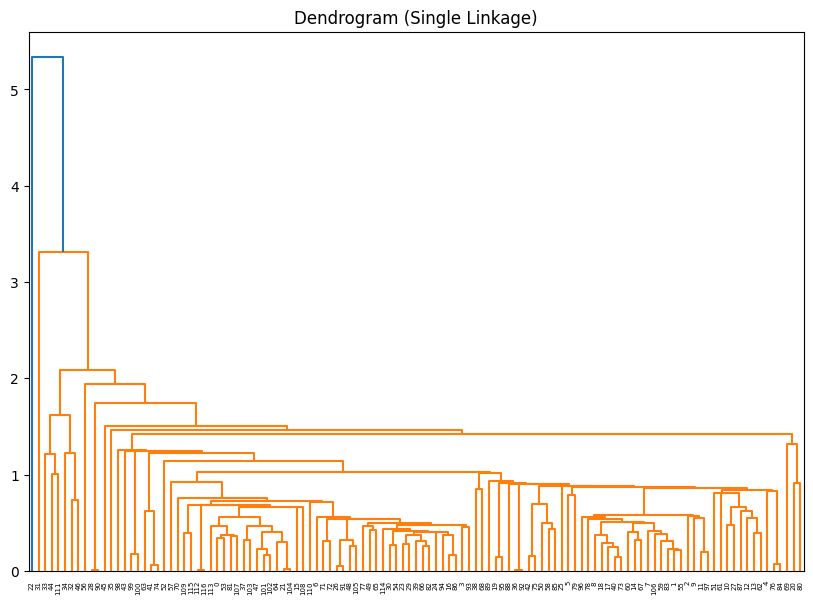

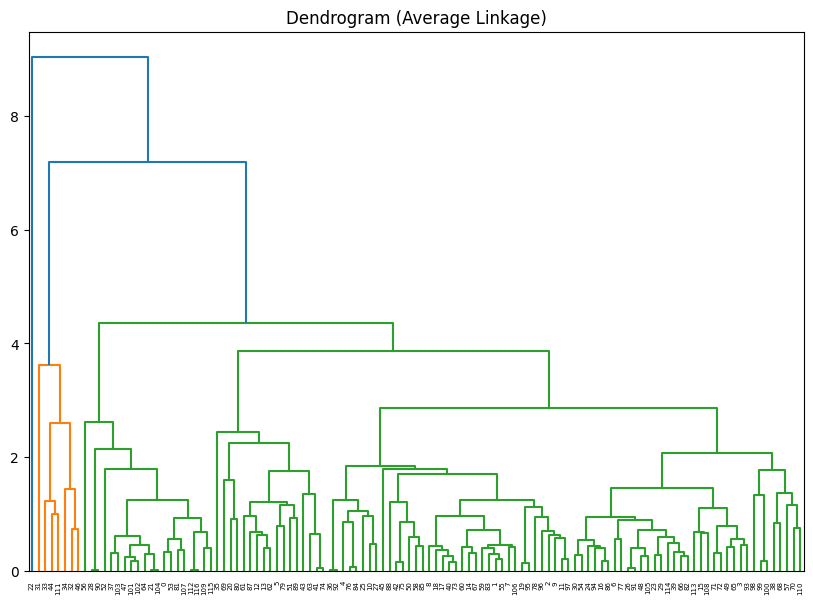

In [33]:
# Dendrogram untuk Single Linkage
plt.figure(figsize=(10, 7))
plt.title('Dendrogram (Single Linkage)')
hierarchy.dendrogram(Z_single)
plt.show()

# Dendrogram untuk Average Linkage
plt.figure(figsize=(10, 7))
plt.title('Dendrogram (Average Linkage)')
hierarchy.dendrogram(Z_average)
plt.show()


Pada langkah ini, dilakukan visualisasi dendrogram untuk masing-masing metode clustering, yaitu Single Linkage dan Average Linkage, menggunakan fungsi hierarchy.dendrogram dari SciPy. Dendrogram ini menggambarkan proses agglomerasi cluster secara hierarkis, di mana setiap titik mulai sebagai cluster sendiri dan kemudian bergabung dengan cluster lain berdasarkan metode yang dipilih. Dendrogram untuk Single Linkage ditampilkan pertama, diikuti dengan dendrogram untuk Average Linkage, yang memungkinkan perbandingan cara kedua metode tersebut mengelompokkan data berdasarkan jarak antar cluster.

Dua gambar yang dihasilkan dari kode di atas menunjukkan dendrogram untuk metode clustering agglomeratif dengan single linkage dan average linkage.

Dendrogram pertama, yang menggunakan single linkage, menunjukkan penggabungan kluster berdasarkan jarak terdekat antar titik. Dalam dendrogram ini, terlihat bahwa penggabungan kluster terjadi pada jarak yang lebih kecil, yang menghasilkan struktur yang lebih panjang dan terfragmentasi. Hal ini mencerminkan kecenderungan single linkage untuk menggabungkan titik-titik yang berdekatan, meskipun mereka mungkin tidak memiliki kesamaan yang kuat, sehingga beberapa kluster tampak lebih menyatu dan kurang terpisah.

Sebaliknya, dendrogram kedua yang menggunakan average linkage menunjukkan penggabungan kluster dengan mempertimbangkan rata-rata jarak antar titik dalam kluster. Dendrogram ini cenderung menghasilkan kluster yang lebih seimbang dan terpisah dengan jelas, dengan batas kluster yang lebih terdefinisi. Ini terlihat dari penggabungan kluster yang terjadi pada jarak yang lebih besar, mencerminkan kemampuan average linkage untuk mengurangi pengaruh dari titik-titik yang sangat dekat. Secara keseluruhan, kedua dendrogram ini memberikan wawasan yang berbeda tentang bagaimana data dapat dikelompokkan, tergantung pada metode linkage yang digunakan, dan membantu dalam memahami struktur data yang mendasarinya.

SPICIT-LEARN

In [34]:
# Menghitung Distance Matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]



Kode diatas digunakan untuk menghitung matriks jarak (distance matrix) antara setiap pasangan data dalam dataset yang telah dinormalisasi. Fungsi distance_matrix dari modul scipy.spatial menerima dua argumen, yaitu feature_mtx, yang berisi data yang telah dinormalisasi, dan menghitung jarak antara setiap pasangan data dalam matriks tersebut. Matriks jarak ini adalah representasi numerik dari seberapa jauh satu titik data dengan titik data lainnya dalam ruang fitur. Setiap elemen dalam matriks tersebut mewakili jarak Euclidean antara dua titik data. Hasil dari perhitungan ini kemudian dicetak dengan print(dist_matrix), sehingga kita dapat melihat matriks jarak antara semua pasangan data di dalam dataset. Matriks ini digunakan sebagai dasar untuk proses clustering, baik menggunakan metode hierarchical clustering (SciPy) maupun agglomerative clustering (Scikit-learn).

In [35]:
# Agglomerative Clustering dengan Single Linkage
agglom_single = AgglomerativeClustering(n_clusters=6, linkage='single')
agglom_single.fit(feature_mtx)
agglom_single.labels_

# Menyimpan hasil cluster ke dalam DataFrame
pdf['cluster_single'] = agglom_single.labels_
pdf.head()


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_single
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0



Pada kode ini, dilakukan proses Agglomerative Clustering dengan menggunakan metode single linkage menggunakan AgglomerativeClustering dari scikit-learn. Pertama, objek agglom_single dibuat dengan menetapkan jumlah klaster sebanyak 6 dan jenis linkage yang digunakan adalah 'single'. Fungsi fit() digunakan untuk melatih model clustering dengan dataset yang telah dinormalisasi, yaitu feature_mtx. Setelah model terlatih, label klaster untuk setiap data dihitung dan disimpan dalam atribut labels_ dari objek agglom_single. Label klaster ini kemudian dimasukkan ke dalam kolom baru pada DataFrame pdf dengan nama cluster_single. Hasilnya adalah kolom baru yang menunjukkan klaster mana setiap kendaraan berada, yang selanjutnya bisa digunakan untuk analisis lebih lanjut atau visualisasi klaster. Dengan begitu, dataset pdf kini memiliki informasi tentang klaster yang diperoleh dari proses clustering menggunakan single linkage.

In [36]:
# Agglomerative Clustering dengan Average Linkage
agglom_average = AgglomerativeClustering(n_clusters=6, linkage='average')
agglom_average.fit(feature_mtx)
agglom_average.labels_

# Menyimpan hasil cluster ke dalam DataFrame
pdf['cluster_average'] = agglom_average.labels_
pdf.head()


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_single,cluster_average
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0,4



Pada kode ini, dilakukan Agglomerative Clustering dengan menggunakan metode average linkage menggunakan AgglomerativeClustering dari scikit-learn. Sama seperti pada metode single linkage, objek agglom_average dibuat dengan menentukan jumlah klaster sebanyak 6 dan jenis linkage yang digunakan adalah 'average'. Proses clustering dilakukan dengan memanggil metode fit() pada data yang sudah dinormalisasi, yaitu feature_mtx, untuk membentuk klaster berdasarkan kedekatan rata-rata antar titik data. Hasil dari proses clustering ini, berupa label klaster untuk setiap data, kemudian disimpan dalam kolom baru pada DataFrame pdf yang diberi nama cluster_average. Dengan demikian, DataFrame pdf sekarang memiliki dua kolom klaster yaitu cluster_single untuk klaster hasil single linkage dan cluster_average untuk klaster hasil average linkage, yang dapat digunakan untuk perbandingan atau analisis lebih lanjut.

<ipython-input-37-ff8872aeb0d9>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, c=color)


Text(0, 0.5, 'mpg')

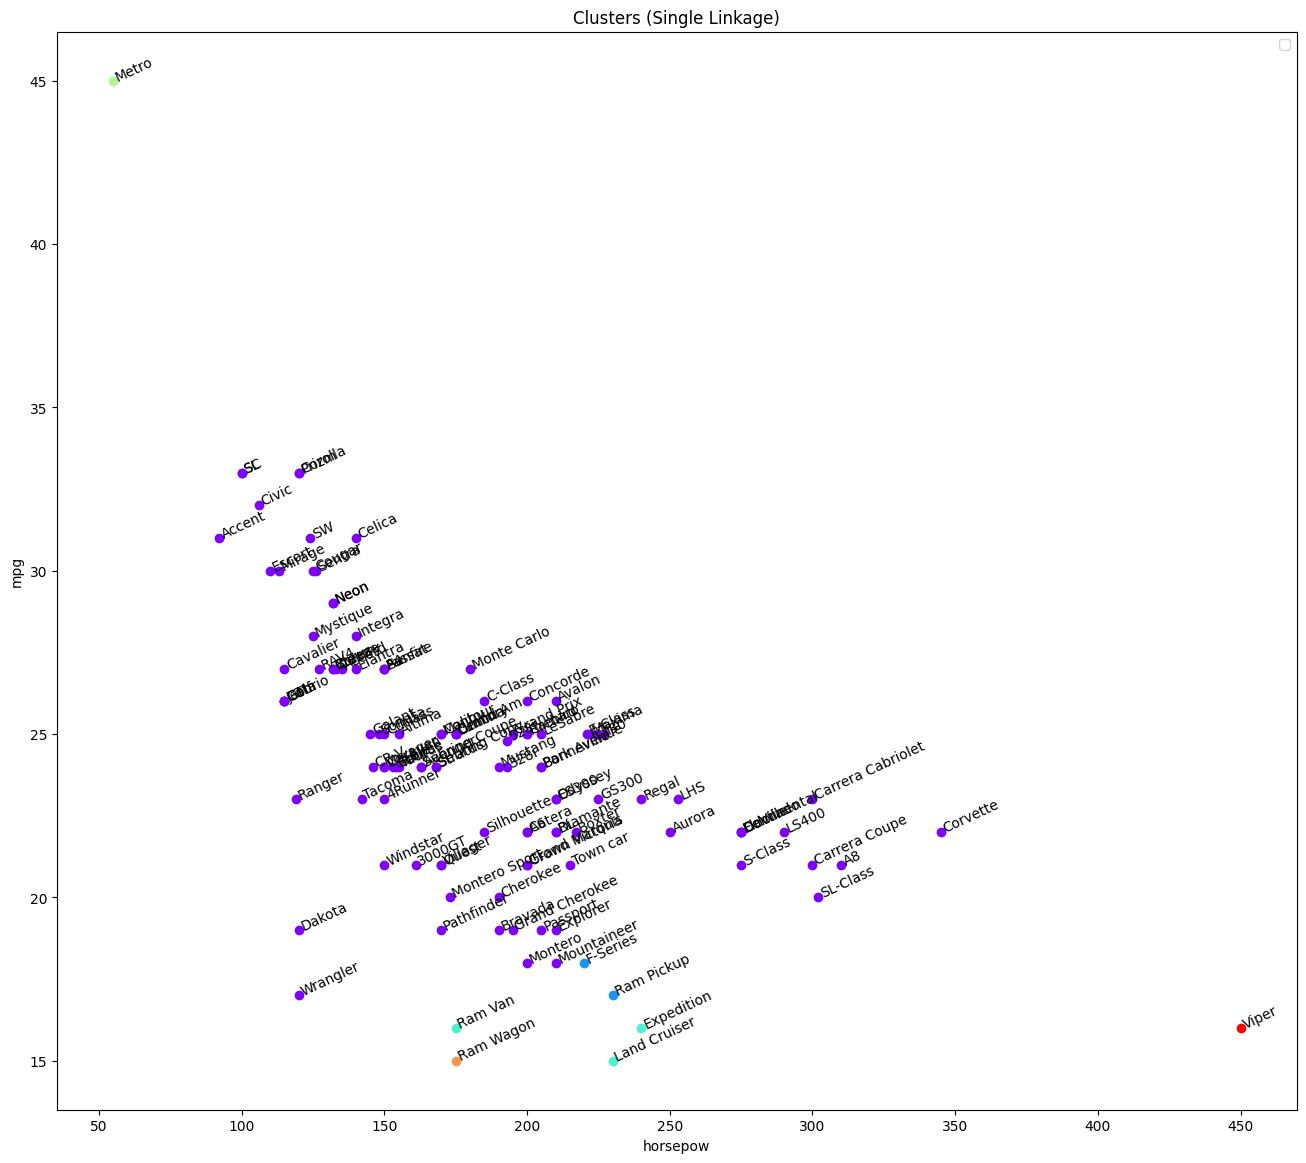

In [37]:
# Visualisasi hasil clustering untuk Single Linkage
import matplotlib.cm as cm
n_clusters_single = max(agglom_single.labels_)+1  # Jumlah cluster dari Single Linkage
colors_single = cm.rainbow(np.linspace(0, 1, n_clusters_single))
cluster_labels_single = list(range(0, n_clusters_single))

# Create a figure
plt.figure(figsize=(16,14))

for color, label in zip(colors_single, cluster_labels_single):
    subset = pdf[pdf.cluster_single == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, c=color)

plt.legend()
plt.title('Clusters (Single Linkage)')
plt.xlabel('horsepow')
plt.ylabel('mpg')



Pada kode ini, dilakukan visualisasi hasil clustering menggunakan metode single linkage. Pertama, jumlah klaster yang terbentuk dari hasil clustering dihitung dengan mencari nilai maksimum dari agglom_single.labels_ dan menambahkannya dengan 1. Kemudian, dibuatlah kolormap colors_single yang mengasosiasikan setiap klaster dengan warna yang berbeda menggunakan colormap rainbow dari matplotlib. Selanjutnya, sebuah grafik scatter dibuat dengan ukuran gambar 16x14 inci. Setiap titik data pada plot diwakili oleh nilai horsepow (horsepower) pada sumbu x dan mpg (miles per gallon) pada sumbu y, dengan setiap klaster diwarnai sesuai dengan warna yang ditentukan sebelumnya. Untuk setiap titik, nama model mobil ditampilkan di samping titik tersebut. Setelah semua klaster ditampilkan, legenda ditambahkan untuk mengidentifikasi warna klaster dan grafik diberi judul serta label sumbu x dan y. Visualisasi ini memberikan gambaran yang jelas tentang bagaimana klaster-klaster terbentuk berdasarkan karakteristik horsepow dan mpg mobil.

<ipython-input-38-0bbf32edc853>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, c=color)


Text(0, 0.5, 'mpg')

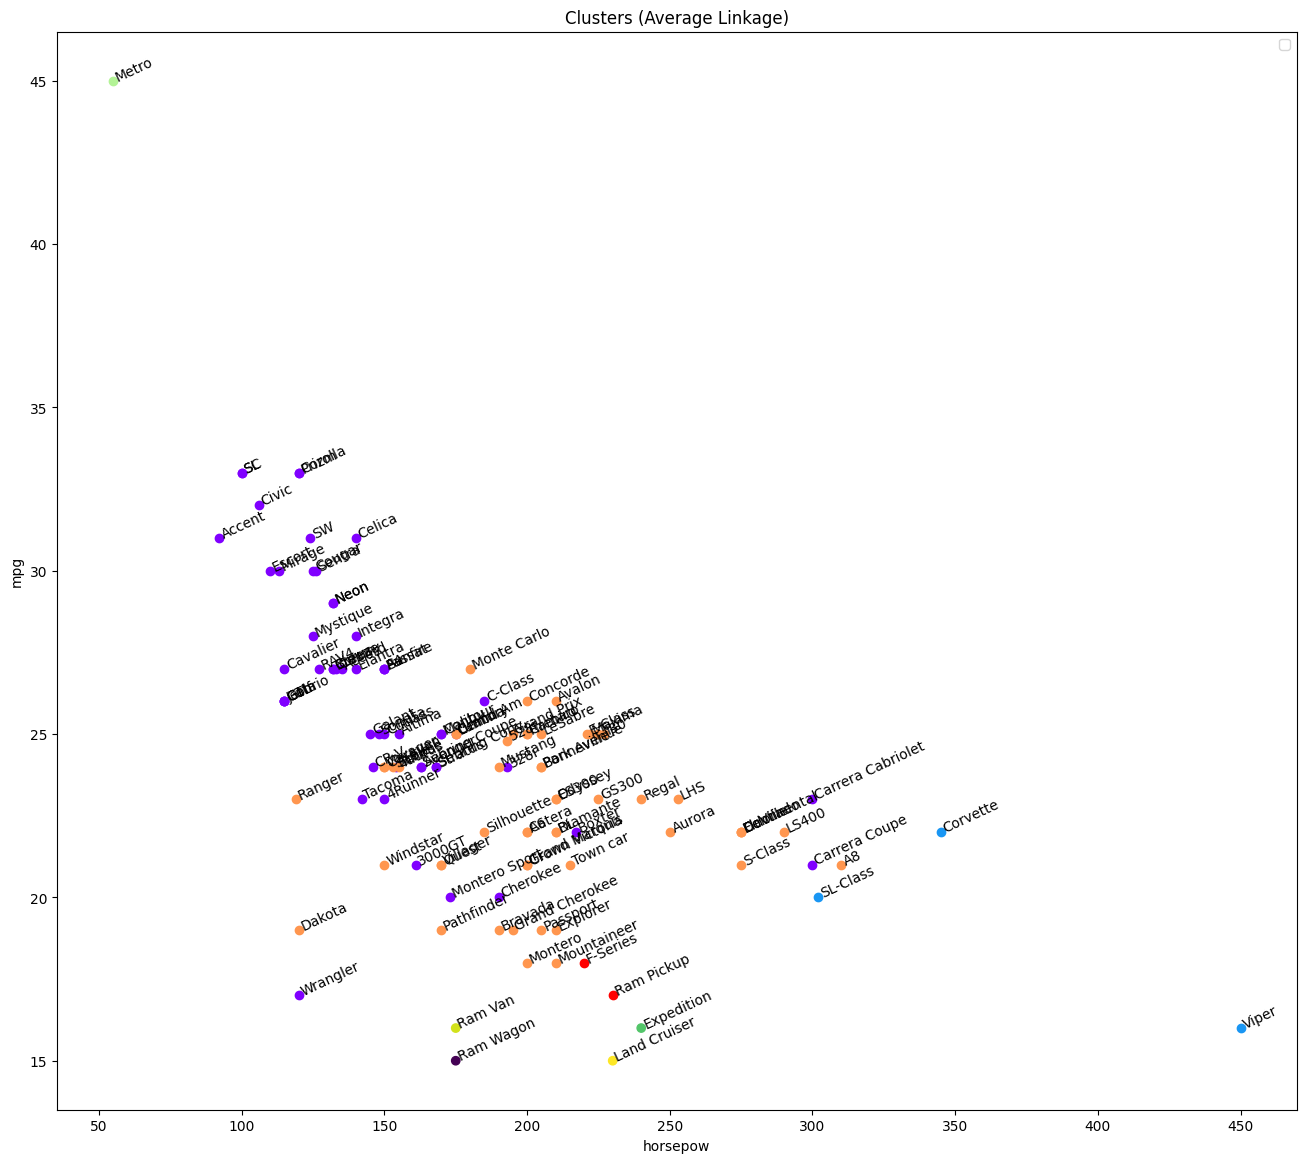

In [38]:
# Visualisasi hasil clustering untuk Average Linkage
n_clusters_average = max(agglom_average.labels_)+1  # Jumlah cluster dari Average Linkage
colors_average = cm.rainbow(np.linspace(0, 1, n_clusters_average))
cluster_labels_average = list(range(0, n_clusters_average))

# Create a figure
plt.figure(figsize=(16,14))

for color, label in zip(colors_average, cluster_labels_average):
    subset = pdf[pdf.cluster_average == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, c=color)

plt.legend()
plt.title('Clusters (Average Linkage)')
plt.xlabel('horsepow')
plt.ylabel('mpg')


Pada kode ini, dilakukan visualisasi hasil clustering menggunakan metode average linkage. Pertama, jumlah klaster yang terbentuk dihitung dengan mencari nilai maksimum dari agglom_average.labels_ dan menambahkannya dengan 1. Kemudian, dibuat kolormap colors_average yang mengasosiasikan setiap klaster dengan warna yang berbeda menggunakan colormap rainbow dari matplotlib. Selanjutnya, sebuah grafik scatter dibuat dengan ukuran gambar 16x14 inci. Setiap titik data diwakili oleh nilai horsepow (horsepower) pada sumbu x dan mpg (miles per gallon) pada sumbu y, dengan warna yang menunjukkan klaster yang relevan. Nama model mobil ditampilkan di samping titik data tersebut. Setelah semua klaster ditampilkan, legenda ditambahkan untuk mempermudah identifikasi warna klaster, serta grafik diberi judul dan label sumbu x dan y. Visualisasi ini memudahkan pemahaman mengenai distribusi klaster berdasarkan karakteristik horsepow dan mpg mobil, dan menunjukkan perbedaan hasil clustering antara metode single linkage dan average linkage.

In [39]:
# Menghitung rata-rata variabel untuk setiap cluster berdasarkan Single Linkage
agg_cars_single = pdf.groupby(['cluster_single', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars_single


horsepow  engine_s        mpg      price
cluster_single type                                            
0              0.0   181.197674  2.902326  25.358140  26.286779
               1.0   167.478261  3.095652  21.000000  22.811261
1              1.0   225.000000  4.900000  17.500000  23.197500
2              1.0   215.000000  4.400000  15.666667  35.479333
3              0.0    55.000000  1.000000  45.000000   9.235000
4              1.0   175.000000  3.900000  15.000000  21.315000
5              0.0   450.000000  8.000000  16.000000  69.725000


Pada kode ini, dilakukan agregasi data untuk menghitung rata-rata variabel tertentu dalam setiap klaster yang dihasilkan oleh metode single linkage. Fungsi groupby() digunakan untuk mengelompokkan data berdasarkan kolom cluster_single (yang menunjukkan klaster hasil dari single linkage) dan type (jenis mobil). Kemudian, untuk setiap grup (klaster), dihitung rata-rata dari beberapa variabel yang relevan, yaitu horsepow (horsepower), engine_s (engine size), mpg (miles per gallon), dan price (harga mobil). Hasilnya adalah sebuah DataFrame baru yang menunjukkan rata-rata nilai variabel-variabel tersebut untuk setiap kombinasi klaster dan jenis mobil. Agregasi ini membantu untuk memahami karakteristik rata-rata dari setiap klaster, seperti performa mesin, efisiensi bahan bakar, dan harga mobil dalam masing-masing klaster.

In [40]:
# Menghitung rata-rata variabel untuk setiap cluster berdasarkan Average Linkage
agg_cars_average = pdf.groupby(['cluster_average', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars_average


horsepow  engine_s        mpg      price
cluster_average type                                            
0               0.0   146.531915  2.246809  27.021277  20.306128
                1.0   149.714286  2.657143  22.000000  18.551571
1               0.0   365.666667  6.233333  19.333333  66.010000
2               1.0   205.000000  4.275000  15.500000  31.938250
3               0.0    55.000000  1.000000  45.000000   9.235000
4               0.0   217.540541  3.602703  23.481081  31.837027
                1.0   175.250000  3.287500  20.562500  24.674875
5               1.0   225.000000  4.900000  17.500000  23.197500

Pada kode ini, dilakukan agregasi data untuk menghitung rata-rata variabel tertentu dalam setiap klaster yang dihasilkan oleh metode average linkage. Fungsi groupby() digunakan untuk mengelompokkan data berdasarkan kolom cluster_average (yang menunjukkan klaster hasil dari average linkage) dan type (jenis mobil). Setelah itu, dihitung rata-rata dari beberapa variabel penting, yaitu horsepow (horsepower), engine_s (engine size), mpg (miles per gallon), dan price (harga mobil) untuk setiap kombinasi klaster dan jenis mobil. Hasilnya adalah sebuah DataFrame yang memperlihatkan karakteristik rata-rata dari setiap klaster dalam hal performa, efisiensi bahan bakar, dan harga mobil, berdasarkan metode pengelompokan average linkage. Analisis ini memungkinkan kita untuk memahami perbedaan antar klaster berdasarkan fitur-fitur yang relevan.

<ipython-input-41-bf3babc0920b>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i))+', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-41-bf3babc0920b>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

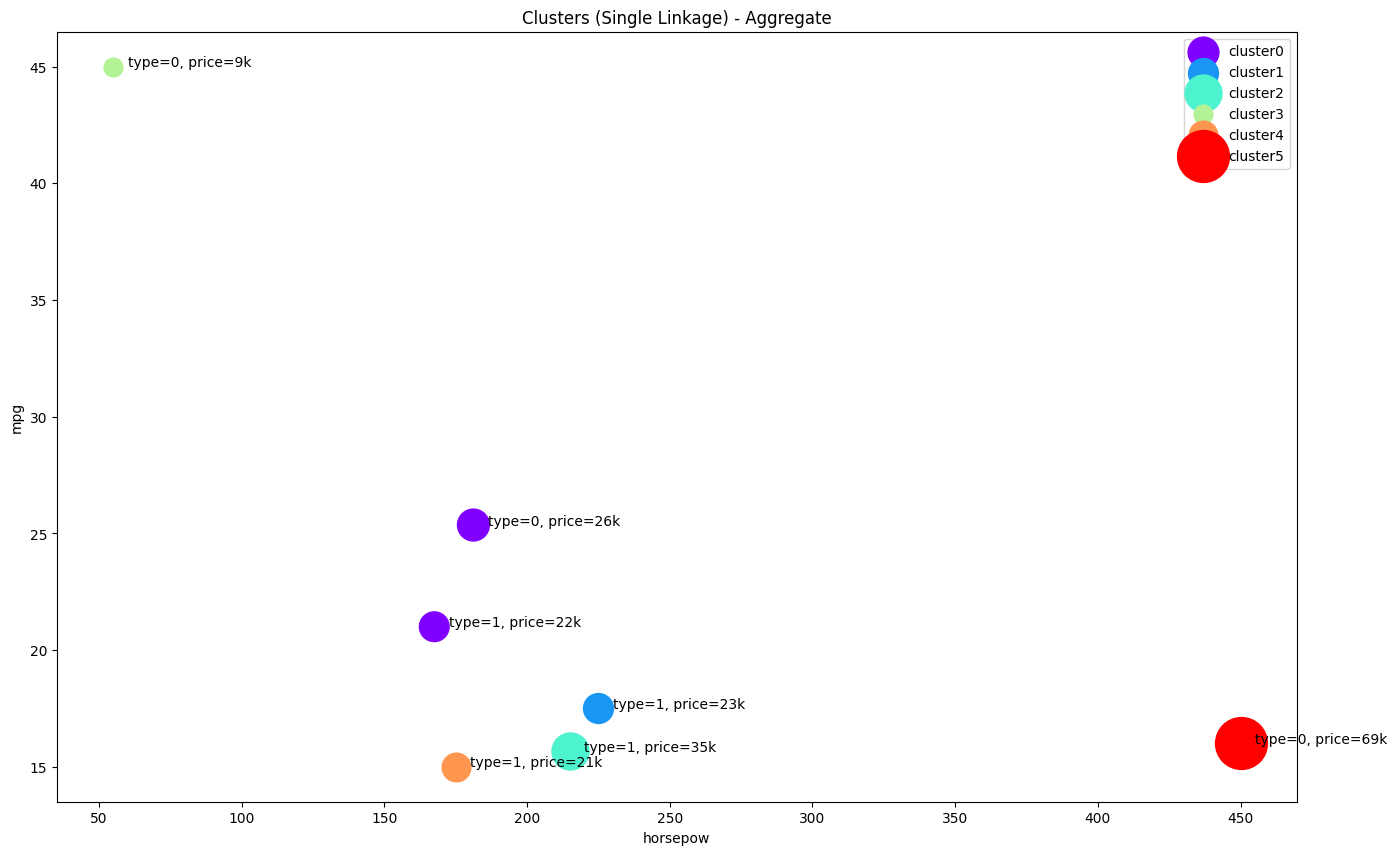

In [41]:
plt.figure(figsize=(16,10))
for color, label in zip(colors_single, cluster_labels_single):
    subset = agg_cars_single.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i))+', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters (Single Linkage) - Aggregate')
plt.xlabel('horsepow')
plt.ylabel('mpg')



Pada kode ini, dilakukan visualisasi hasil klastering menggunakan Single Linkage berdasarkan rata-rata variabel dalam setiap klaster yang telah dihitung sebelumnya. Setiap klaster ditampilkan dengan warna berbeda, dan ukuran titik pada scatter plot mencerminkan harga mobil dalam klaster tersebut (dengan pengali 20 untuk memperbesar ukuran titik). Untuk setiap titik, label yang berisi informasi tentang jenis mobil (type) dan harga (price) ditambahkan pada posisi yang tepat di dekat titik tersebut. Hal ini membantu untuk mengidentifikasi karakteristik mobil dalam setiap klaster, misalnya jenis dan harga rata-rata mobil dalam klaster tersebut. Plot ini memberikan gambaran visual yang jelas mengenai hubungan antara horsepower, efisiensi bahan bakar (mpg), dan harga untuk setiap klaster yang terbentuk menggunakan metode Single Linkage.

<ipython-input-42-09589642da85>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i))+', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-42-09589642da85>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

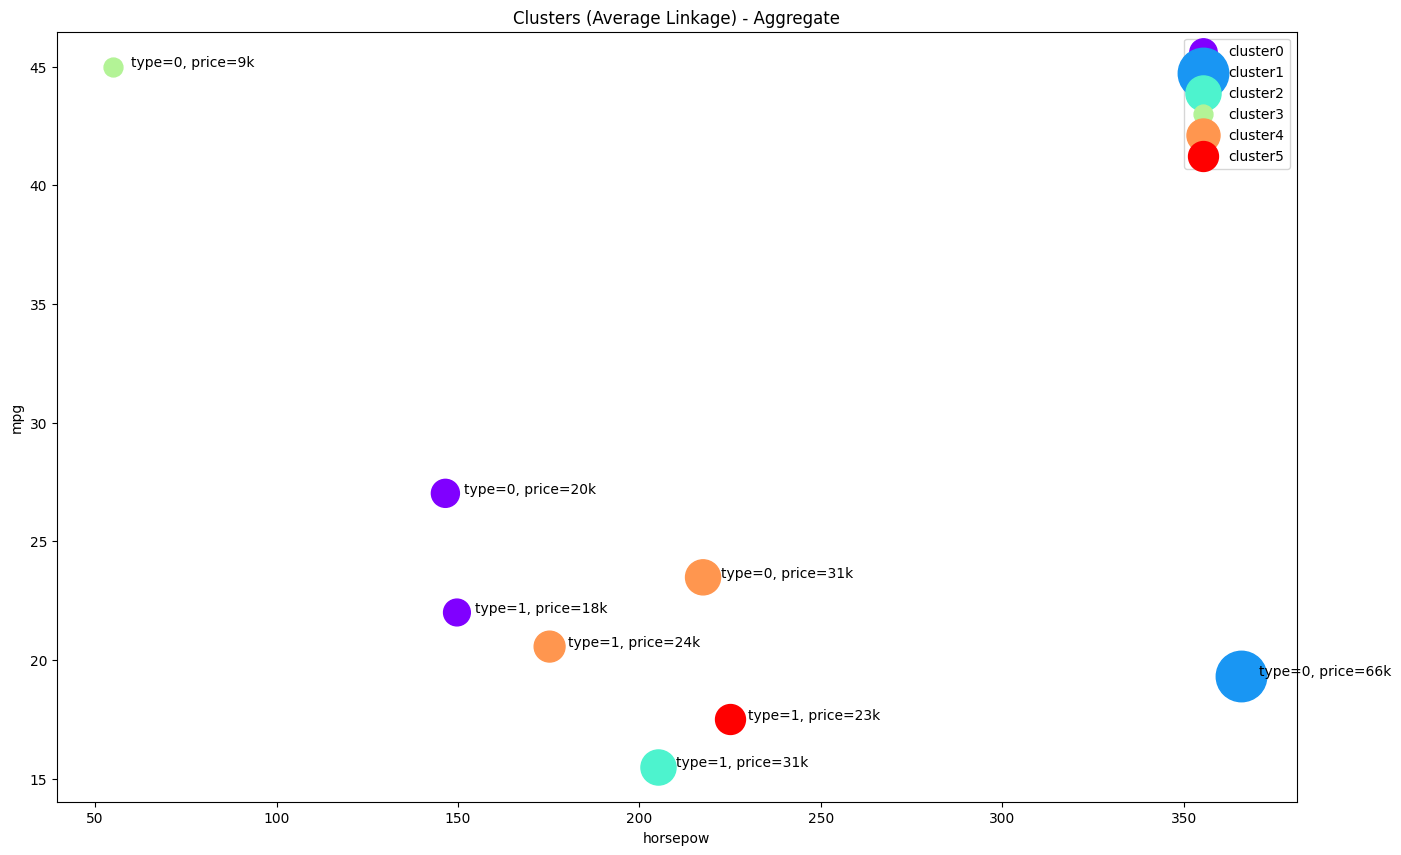

In [42]:
plt.figure(figsize=(16,10))
for color, label in zip(colors_average, cluster_labels_average):
    subset = agg_cars_average.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i))+', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters (Average Linkage) - Aggregate')
plt.xlabel('horsepow')
plt.ylabel('mpg')



Pada kode ini, dilakukan visualisasi hasil klastering menggunakan Average Linkage berdasarkan rata-rata variabel dalam setiap klaster yang telah dihitung sebelumnya. Seperti halnya dengan Single Linkage, setiap klaster ditampilkan dengan warna yang berbeda, dan ukuran titik dalam scatter plot menggambarkan harga mobil di setiap klaster, dengan pengali 20 untuk memperbesar ukuran titik. Informasi tambahan tentang jenis mobil (type) dan harga mobil (price) juga ditambahkan sebagai label pada masing-masing titik. Visualisasi ini memberikan gambaran tentang hubungan antara horsepower, efisiensi bahan bakar (mpg), dan harga mobil di setiap klaster yang terbentuk dengan metode Average Linkage. Tujuannya adalah untuk memudahkan analisis karakteristik mobil dalam setiap klaster, terutama dalam hal perbedaan harga dan tipe mobil yang tergabung dalam klaster tersebut.

In [43]:
# Agglomerative Clustering menggunakan Single Linkage dengan scikit-learn
agg_single = AgglomerativeClustering(n_clusters=4, linkage='single')
y_single = agg_single.fit_predict(feature_mtx)  # Data yang sudah dinormalisasi

# Agglomerative Clustering menggunakan Average Linkage dengan scikit-learn
agg_average = AgglomerativeClustering(n_clusters=4, linkage='average')
y_average = agg_average.fit_predict(feature_mtx)  # Data yang sudah dinormalisasi

Pada langkah ini, dilakukan implementasi Agglomerative Clustering menggunakan scikit-learn dengan dua metode linkage: Single Linkage dan Average Linkage. Untuk masing-masing metode, objek AgglomerativeClustering dibuat dengan parameter n_clusters=4, yang berarti algoritma akan membagi data menjadi 4 cluster. Setelah itu, data yang sudah dinormalisasi (feature_mtx) diterapkan pada model menggunakan fit_predict(), yang menghasilkan label cluster untuk setiap titik data. Variabel y_single menyimpan hasil clustering untuk Single Linkage, sementara y_average menyimpan hasil clustering untuk Average Linkage.

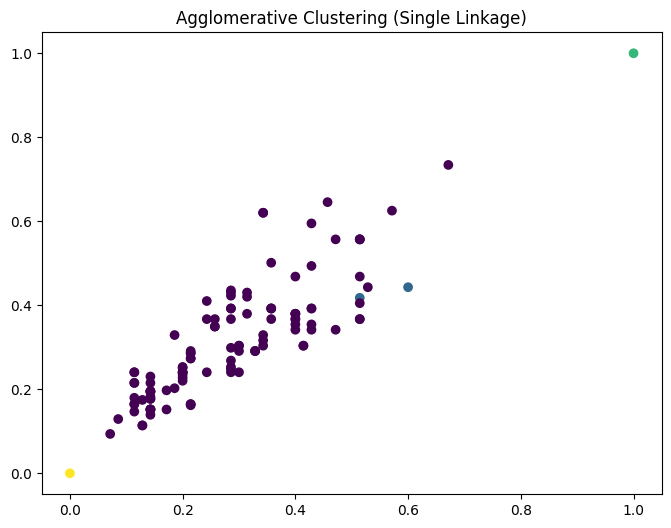

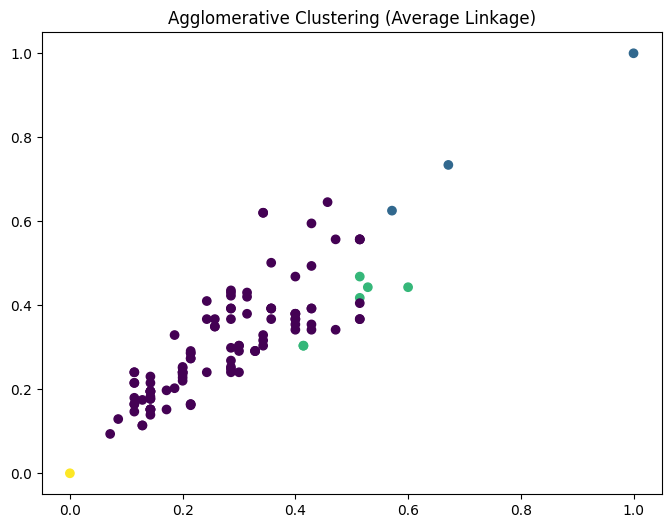

In [44]:
# Visualisasi hasil clustering untuk Single Linkage
plt.figure(figsize=(8, 6))
plt.scatter(feature_mtx[:, 0], feature_mtx[:, 1], c=y_single, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering (Single Linkage)')
plt.show()

# Visualisasi hasil clustering untuk Average Linkage
plt.figure(figsize=(8, 6))
plt.scatter(feature_mtx[:, 0], feature_mtx[:, 1], c=y_average, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering (Average Linkage)')
plt.show()



Pada bagian ini, dilakukan visualisasi hasil clustering untuk masing-masing metode linkage yang digunakan, yaitu Single Linkage dan Average Linkage. Pertama, sebuah figur berukuran 8x6 inci dibuat untuk setiap plot menggunakan plt.figure(). Kemudian, plt.scatter() digunakan untuk memplot data yang telah dikelompokkan ke dalam cluster, di mana sumbu x dan y menunjukkan dua fitur pertama dari data yang telah dinormalisasi (feature_mtx), dan warna titik data ditentukan oleh label cluster (y_single untuk Single Linkage dan y_average untuk Average Linkage). Warna titik diatur menggunakan cmap='viridis' untuk memberikan gradasi warna berdasarkan cluster. Judul plot masing-masing diberikan dengan plt.title(), kemudian plot tersebut ditampilkan menggunakan plt.show(). Dengan visualisasi ini, perbedaan hasil clustering antara Single Linkage dan Average Linkage dapat lebih jelas terlihat.

Hasil dari kedua gambar tersebut menunjukkan visualisasi clustering agglomeratif menggunakan metode single linkage dan average linkage pada dataset yang sama.

Pada grafik pertama, yang menggunakan single linkage, terlihat bahwa data dikelompokkan menjadi beberapa kluster, dengan satu kluster yang terpisah di bagian kiri bawah (ditandai dengan warna kuning) dan sebagian besar titik lainnya terdistribusi dalam kluster yang lebih padat di bagian kanan. Metode single linkage cenderung menghasilkan kluster yang lebih panjang dan terfragmentasi, di mana beberapa titik dari kluster yang berbeda mungkin saling berdekatan, menciptakan batas yang kurang jelas antara kluster.

Sebaliknya, grafik kedua yang menggunakan average linkage menunjukkan hasil clustering yang lebih seimbang dan terpisah dengan jelas. Kluster-kluster yang terbentuk lebih kompak, dan batas antar kluster lebih terdefinisi, mencerminkan kemampuan average linkage untuk mempertimbangkan jarak rata-rata antar titik dalam kluster. Dalam grafik ini, terlihat bahwa beberapa titik yang sebelumnya terpisah dalam single linkage kini tergabung dalam kluster yang lebih terorganisir. Secara keseluruhan, perbandingan kedua grafik ini menunjukkan bagaimana metode linkage yang berbeda dapat mempengaruhi hasil clustering dan struktur data yang dihasilkan.

Single Linkage (Nearest Point Method): Dalam Single Linkage, jarak antara dua klaster dihitung berdasarkan jarak terpendek antara titik data dalam kedua klaster tersebut. Dengan kata lain, jika ada dua titik yang sangat dekat satu sama lain di dua klaster yang berbeda, maka klaster-klaster tersebut akan digabungkan, meskipun sebagian besar titik lainnya berada jauh dari satu sama lain. Hal ini dapat menyebabkan terbentuknya klaster yang sangat panjang dan tipis, seperti rantai (chain-like), karena klaster dapat bergabung dengan hanya satu titik yang sangat dekat.

Average Linkage (Centroid Method): Average Linkage, di sisi lain, menghitung jarak antara dua klaster dengan mengambil rata-rata jarak antar semua pasangan titik yang ada di kedua klaster tersebut. Ini berarti bahwa keseluruhan struktur kedua klaster dipertimbangkan dalam menentukan apakah klaster-klaster tersebut harus digabungkan. Dengan pendekatan ini, klaster-klaster yang terbentuk cenderung lebih seimbang dan lebih bulat karena perhitungan jaraknya lebih stabil dan tidak terlalu dipengaruhi oleh beberapa titik yang mungkin sangat dekat.

Perbedaan Utama:
Single Linkage cenderung menghasilkan klaster yang lebih memanjang atau berbentuk rantai, karena penggabungan klaster bisa terjadi hanya berdasarkan satu pasangan titik yang sangat dekat. Ini sering kali menyebabkan klaster menjadi lebih longgar dan rentan terhadap noise.
Average Linkage cenderung menghasilkan klaster yang lebih seimbang dan bulat, karena pendekatannya mempertimbangkan rata-rata jarak seluruh titik dalam klaster. Ini membuatnya lebih stabil dan cocok untuk data yang lebih homogen.
Secara keseluruhan, Single Linkage lebih cenderung menghasilkan klaster yang terhubung melalui titik-titik yang sangat dekat dan memanjang, sementara Average Linkage memberikan klaster yang lebih kompak dan terpusat. Perbedaan ini sangat penting dalam pemilihan metode clustering, tergantung pada bentuk dan distribusi data yang ingin dianalisis.

3). Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage, average linkage, dan complete linkage untuk dataset masing-masing! Jelaskan perbedaannya!

In [45]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [46]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)


In [47]:
# Memilih fitur yang akan digunakan untuk clustering
X = dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Menampilkan beberapa data setelah normalisasi
print(X_scaled[:5])


[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]



Pada bagian kode ini, pertama-tama kita memilih fitur yang akan digunakan dalam proses clustering. Fitur yang dipilih dari dataset Iris adalah empat kolom: sepal-length, sepal-width, petal-length, dan petal-width, yang disimpan dalam variabel X. Kemudian, data yang telah dipilih ini dinormalisasi menggunakan teknik MinMaxScaler dari library sklearn.preprocessing. Proses normalisasi ini bertujuan untuk mengubah skala nilai pada setiap fitur ke dalam rentang antara 0 dan 1, sehingga setiap fitur memiliki kontribusi yang setara dalam analisis clustering. Proses normalisasi dilakukan dengan memanggil fit_transform() pada objek MinMaxScaler yang diterapkan pada data X. Hasil dari normalisasi ini disimpan dalam variabel X_scaled. Terakhir, untuk memverifikasi hasilnya, ditampilkan 5 baris pertama dari data yang sudah dinormalisasi. Hasilnya menunjukkan bahwa nilai-nilai pada setiap kolom kini berada dalam rentang antara 0 dan 1, memudahkan perbandingan antar fitur dengan skala yang serupa.

Agglomerative Clustering dengan SciPy

a. Single Linkage

In [48]:
from scipy.cluster.hierarchy import linkage, fcluster

# Menghitung jarak antar titik data (pdist)
D = distance_matrix(X_scaled, X_scaled)

# Clustering dengan Single Linkage
Z_single = linkage(D, method='single')

# Membuat cluster dengan k = 3 (jumlah klaster yang diinginkan)
clusters_single = fcluster(Z_single, 3, criterion='maxclust')

# Menampilkan hasil cluster
print("Clusters Single Linkage:")
print(clusters_single)


Clusters Single Linkage:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


<ipython-input-48-13782d113ba5>:7: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = linkage(D, method='single')


Pada bagian kode ini, pertama-tama kita menghitung matriks jarak antar semua titik data menggunakan fungsi distance_matrix dari scipy.spatial. Matriks jarak ini (D) menghitung jarak Euclidean antara setiap pasangan titik dalam data yang telah dinormalisasi (X_scaled). Selanjutnya, dilakukan proses clustering hierarkis menggunakan metode Single Linkage dengan fungsi linkage dari scipy.cluster.hierarchy, yang akan menggabungkan titik-titik data berdasarkan kedekatannya dengan cara mengukur jarak terdekat antara dua klaster. Hasil dari clustering ini disimpan dalam variabel Z_single. Kemudian, kita menentukan jumlah klaster yang diinginkan dengan menggunakan fcluster, yang di sini mengelompokkan data menjadi 3 klaster berdasarkan hasil linkage yang sudah dihitung sebelumnya. Kriteria pemotongan yang digunakan adalah maxclust, yang berarti bahwa kita menginginkan pembentukan 3 klaster. Hasil dari proses clustering ini disimpan dalam variabel clusters_single, yang menunjukkan label klaster untuk setiap data. Hasil yang ditampilkan menunjukkan bahwa sebagian besar data dikelompokkan ke dalam klaster 2, dengan beberapa data lainnya berada di klaster 1 dan 3.

b. Average Linkage

In [49]:
# Clustering dengan Average Linkage
Z_average = linkage(D, method='average')

# Membuat cluster dengan k = 3
clusters_average = fcluster(Z_average, 3, criterion='maxclust')

# Menampilkan hasil cluster
print("Clusters Average Linkage:")
print(clusters_average)


Clusters Average Linkage:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 2 2 3 2 2 2 3
 3 2 3 2 2 3 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 3 3 2 2 2 3 2 2 2 3 3
 2 3]


<ipython-input-49-2f8c7a98d7d1>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_average = linkage(D, method='average')



Pada bagian kode ini, dilakukan proses clustering hierarkis dengan metode Average Linkage. Sama seperti sebelumnya, kita menggunakan fungsi linkage untuk menghitung hasil clustering dengan metode average, yang menggabungkan dua klaster dengan menghitung jarak rata-rata antar semua titik data di dua klaster yang berbeda. Hasil dari clustering ini disimpan dalam variabel Z_average. Kemudian, kita menentukan jumlah klaster yang diinginkan (3 klaster) menggunakan fungsi fcluster, yang akan membentuk 3 klaster berdasarkan hasil linkage yang telah dihitung. Kriteria pemotongan yang digunakan adalah maxclust, yang berarti bahwa algoritma ini akan menghasilkan 3 klaster terpisah. Hasil dari proses clustering ini disimpan dalam variabel clusters_average, yang menunjukkan label klaster untuk setiap data. Berdasarkan hasil yang ditampilkan, sebagian besar data dikelompokkan dalam klaster 1, dengan beberapa data lain berada di klaster 2 dan 3. Perbedaan hasil klasterisasi ini dibandingkan dengan Single Linkage menunjukkan bahwa Average Linkage cenderung menghasilkan pembentukan klaster yang lebih merata, mengingat jarak antar klaster dihitung berdasarkan rata-rata.

 C. Complete Linkage

In [50]:
# Clustering dengan Complete Linkage
Z_complete = linkage(D, method='complete')

# Membuat cluster dengan k = 3
clusters_complete = fcluster(Z_complete, 3, criterion='maxclust')

# Menampilkan hasil cluster
print("Clusters Complete Linkage:")
print(clusters_complete)


Clusters Complete Linkage:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
 3 3 2 3 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 3 3
 3 2]


<ipython-input-50-0227a3192d40>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_complete = linkage(D, method='complete')


Kode ini melakukan Agglomerative Clustering menggunakan metode Complete Linkage pada dataset. Pertama, dihitung jarak antar data menggunakan linkage(D, method='complete'), yang mengelompokkan data berdasarkan jarak terjauh antar titik pada klaster yang berbeda. Kemudian, fcluster(Z_complete, 3, criterion='maxclust') digunakan untuk membagi data ke dalam 3 klaster. Hasilnya adalah array label klaster yang menunjukkan pengelompokan data ke dalam tiga klaster berbeda, dengan sebagian besar data dikelompokkan pada klaster pertama, diikuti oleh klaster kedua dan ketiga.

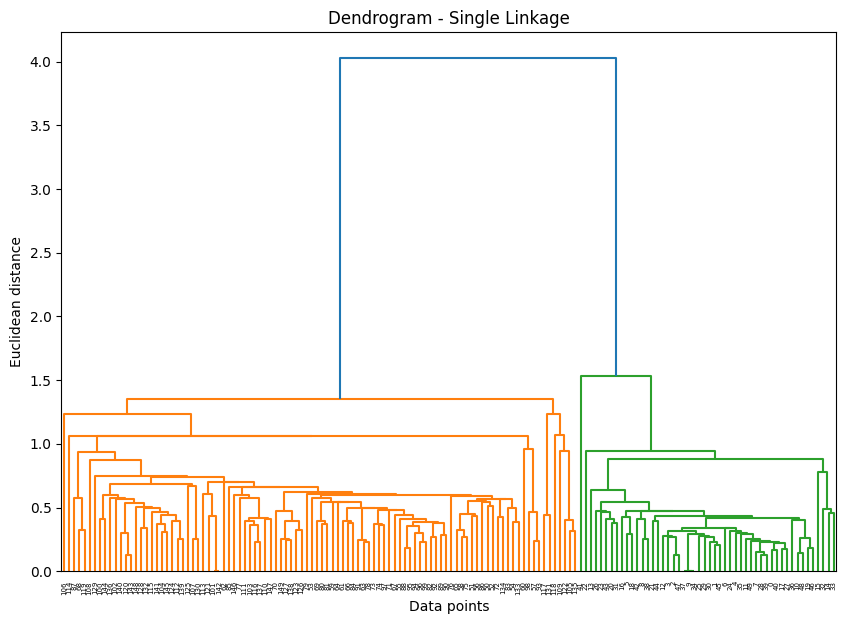

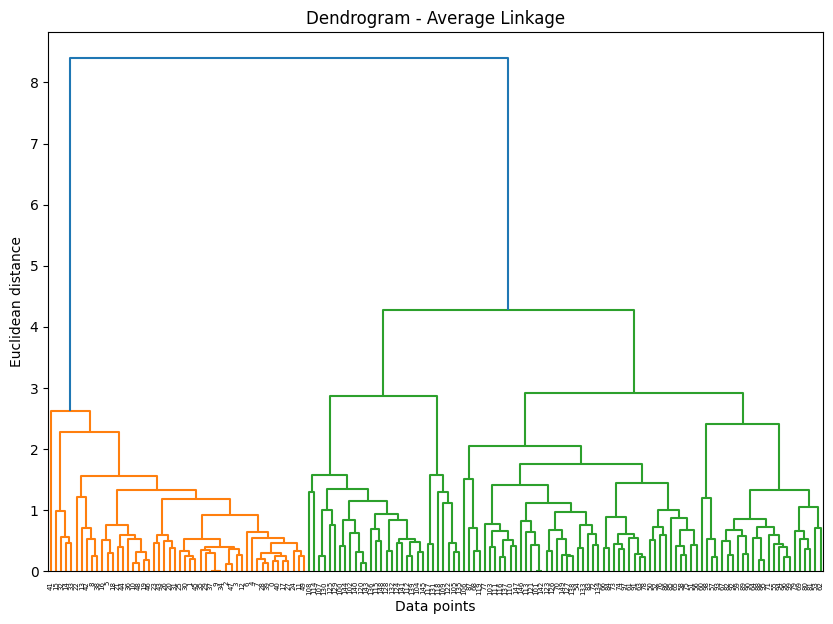

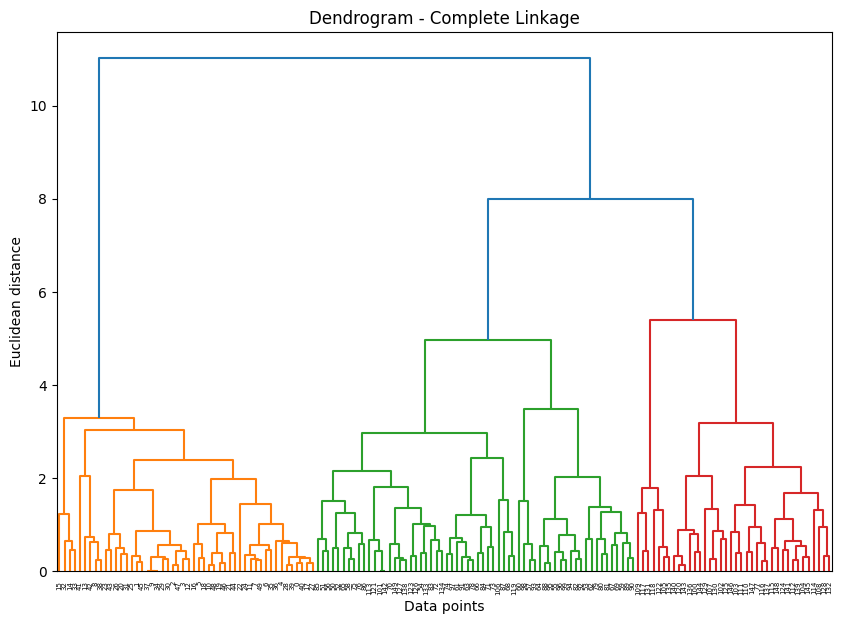

In [51]:
from scipy.cluster.hierarchy import dendrogram

# Dendrogram untuk Single Linkage
plt.figure(figsize=(10, 7))
dendrogram(Z_single)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

# Dendrogram untuk Average Linkage
plt.figure(figsize=(10, 7))
dendrogram(Z_average)
plt.title('Dendrogram - Average Linkage')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

# Dendrogram untuk Complete Linkage
plt.figure(figsize=(10, 7))
dendrogram(Z_complete)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()




Kode di atas digunakan untuk memvisualisasikan dendrogram hasil clustering dengan metode Single Linkage dan Average Linkage. Dendrogram pertama menunjukkan cara klaster-klaster bergabung berdasarkan Single Linkage, di mana klaster bergabung saat jarak terdekat antar elemen. Dendrogram kedua menggambarkan proses penggabungan klaster menggunakan Average Linkage, yang menggabungkan klaster berdasarkan rata-rata jarak antar elemen di dalam klaster. Visualisasi ini membantu untuk memahami bagaimana data dikelompokkan dan memungkinkan kita untuk menentukan jumlah klaster dengan memotong dendrogram pada jarak tertentu.

Hasil dari kedua ketiga tersebut menunjukkan dendrogram untuk metode clustering agglomeratif menggunakan single linkage dan average linkage.

Pada dendrogram pertama, yang menggunakan single linkage, terlihat bahwa penggabungan kluster terjadi pada jarak yang lebih kecil, dengan banyak cabang yang menunjukkan penggabungan titik data yang sangat dekat satu sama lain. Struktur ini mencerminkan kecenderungan single linkage untuk menggabungkan titik-titik yang berdekatan, yang dapat menghasilkan kluster yang lebih panjang dan terfragmentasi. Hal ini terlihat dari banyaknya cabang yang terhubung pada jarak rendah, menunjukkan bahwa beberapa kluster mungkin tidak terpisah dengan jelas.

Sebaliknya, dendrogram kedua yang menggunakan average linkage menunjukkan penggabungan kluster yang lebih seimbang dan terpisah dengan jelas. Dalam dendrogram ini, penggabungan kluster terjadi pada jarak yang lebih besar, menciptakan batas yang lebih jelas antara kluster. Ini mencerminkan kemampuan average linkage untuk mempertimbangkan jarak rata-rata antar titik dalam kluster, sehingga menghasilkan struktur kluster yang lebih kompak dan terorganisir. Secara keseluruhan, perbandingan kedua dendrogram ini memberikan wawasan tentang bagaimana metode linkage yang berbeda mempengaruhi hasil clustering dan struktur data yang dihasilkan.

Hasil dari gambar dendrogram untuk metode complete linkage menunjukkan bagaimana data dikelompokkan berdasarkan jarak Euclidean antar titik. Dalam dendrogram ini, terlihat bahwa penggabungan kluster terjadi pada jarak yang lebih besar dibandingkan dengan metode lainnya, seperti single linkage dan average linkage.

Dendrogram ini menampilkan beberapa cabang yang menunjukkan penggabungan kluster pada berbagai tingkat jarak. Kluster yang terpisah dengan jelas, ditandai dengan warna yang berbeda (orange, green, dan red), menunjukkan bahwa complete linkage cenderung menghasilkan kluster yang lebih kompak dan terdefinisi dengan baik. Metode ini mengutamakan jarak maksimum antar titik dalam kluster, sehingga menghasilkan batas yang lebih jelas antara kluster.

Secara keseluruhan, dendrogram ini memberikan wawasan tentang struktur data dan bagaimana titik-titik data dapat dikelompokkan dengan cara yang lebih terorganisir, mencerminkan kekuatan metode complete linkage dalam mengidentifikasi kluster yang lebih homogen.

Agglomerative Clustering dengan scikit-learn

 Single Linkage dengan scikit-learn

In [52]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering dengan Single Linkage
agg_single = AgglomerativeClustering(n_clusters=3, linkage='single')
clusters_single_sklearn = agg_single.fit_predict(X_scaled)

# Menampilkan hasil cluster
print("Clusters Single Linkage (sklearn):")
print(clusters_single_sklearn)


Clusters Single Linkage (sklearn):
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Kode di atas menggunakan AgglomerativeClustering dari scikit-learn untuk melakukan Agglomerative Clustering dengan metode Single Linkage pada data yang telah dinormalisasi. Dengan menentukan jumlah klaster sebanyak 3 (n_clusters=3), algoritma ini membagi dataset iris menjadi tiga klaster berdasarkan kedekatan antar data. Hasil clustering ditampilkan dalam bentuk array, yang menunjukkan label klaster untuk setiap data poin. Misalnya, label 0, 1, dan 2 menunjukkan masing-masing klaster yang terbentuk. Ini menggambarkan bagaimana data dikelompokkan berdasarkan kesamaan fitur mereka dalam dimensi yang lebih rendah setelah normalisasi.

Average Linkage dengan scikit-learn

In [53]:
# Agglomerative Clustering dengan Average Linkage
agg_average = AgglomerativeClustering(n_clusters=3, linkage='average')
clusters_average_sklearn = agg_average.fit_predict(X_scaled)

# Menampilkan hasil cluster
print("Clusters Average Linkage (sklearn):")
print(clusters_average_sklearn)


Clusters Average Linkage (sklearn):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]



Kode di atas melakukan Agglomerative Clustering dengan metode Average Linkage menggunakan scikit-learn pada dataset iris yang telah dinormalisasi. Sama seperti pada metode sebelumnya, jumlah klaster yang diinginkan adalah 3 (n_clusters=3). Algoritma ini menghitung jarak rata-rata antar elemen dalam satu klaster untuk menentukan kedekatan antar data dan membentuk klaster. Hasil clustering ditampilkan dalam bentuk array, yang menunjukkan label klaster untuk setiap data poin. Pada hasil yang ditampilkan, klaster-klaster yang terbentuk ditandai dengan label 0, 1, dan 2, yang mengelompokkan data berdasarkan kedekatan rata-rata fitur-fitur mereka.

Complete Linkage dengan scikit-learn

In [54]:
# Agglomerative Clustering dengan Complete Linkage
agg_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
clusters_complete_sklearn = agg_complete.fit_predict(X_scaled)

# Menampilkan hasil cluster
print("Clusters Complete Linkage (sklearn):")
print(clusters_complete_sklearn)

Clusters Complete Linkage (sklearn):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 2 1 1
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]



Kode ini menggunakan Agglomerative Clustering dengan metode Complete Linkage pada dataset yang telah dinormalisasi. Pertama, objek AgglomerativeClustering dibuat dengan parameter n_clusters=3 untuk menentukan jumlah klaster yang diinginkan, dan linkage='complete' untuk menggunakan complete linkage, yang mengelompokkan data berdasarkan jarak terjauh antar titik pada klaster yang berbeda. Kemudian, fit_predict(X_scaled) diterapkan untuk melakukan clustering pada data yang telah dinormalisasi, menghasilkan array label klaster yang menunjukkan keanggotaan setiap titik data dalam satu dari tiga klaster. Hasilnya menunjukkan bahwa sebagian besar data dikelompokkan ke dalam klaster pertama, diikuti oleh klaster kedua dan ketiga.

Visualisasi Hasil Clustering

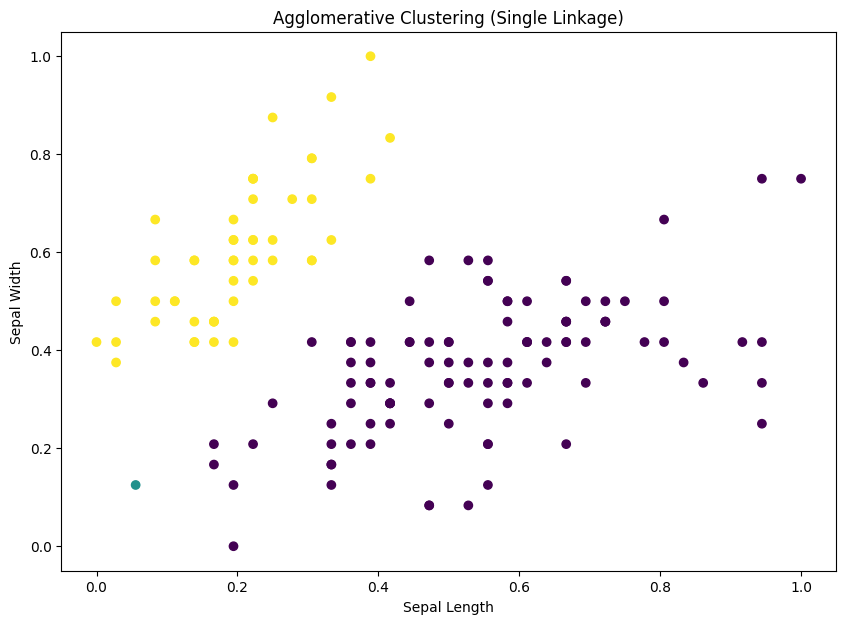

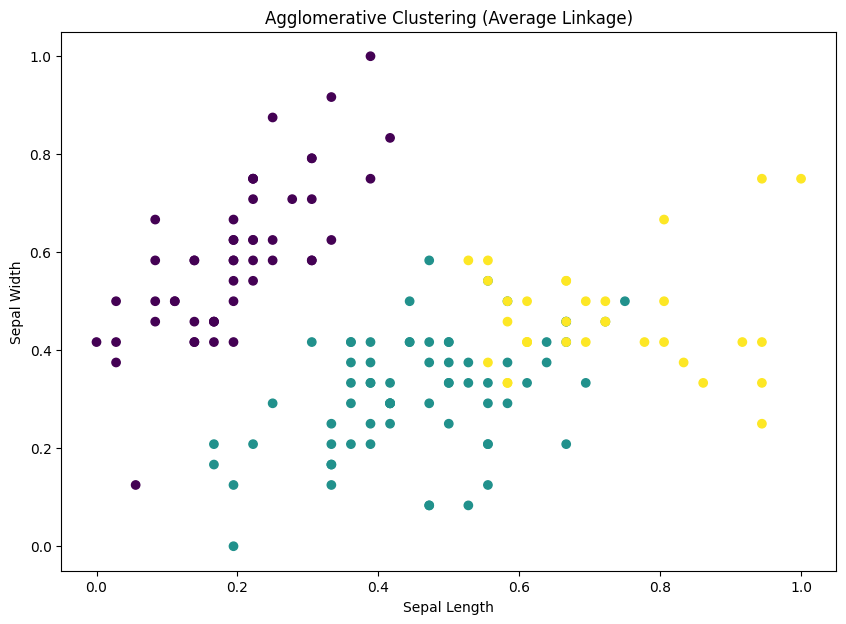

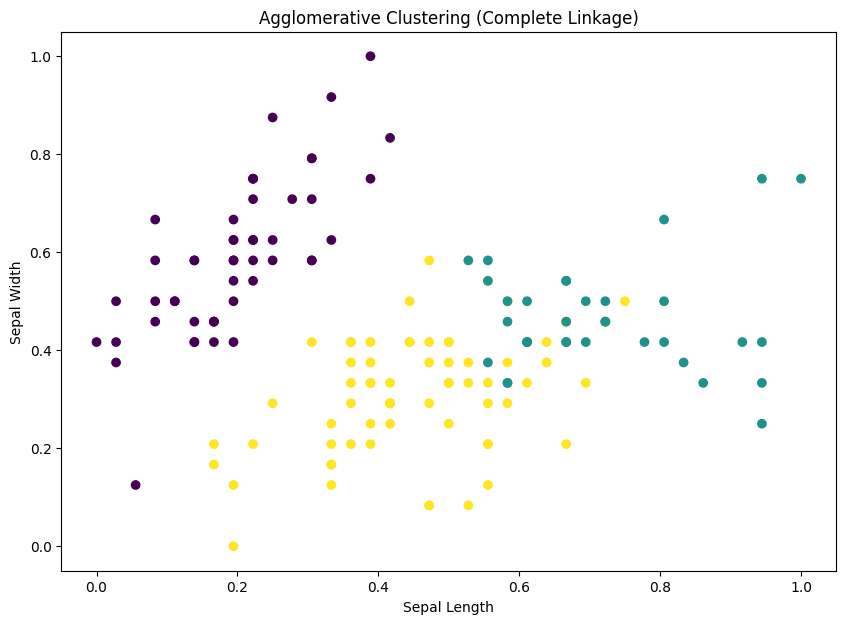

In [55]:
import matplotlib.pyplot as plt

# Visualisasi hasil clustering untuk Single Linkage
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_single_sklearn, cmap='viridis')
plt.title('Agglomerative Clustering (Single Linkage)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Visualisasi hasil clustering untuk Average Linkage
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_average_sklearn, cmap='viridis')
plt.title('Agglomerative Clustering (Average Linkage)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Visualisasi hasil clustering untuk Complete Linkage
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_complete_sklearn, cmap='viridis')
plt.title('Agglomerative Clustering (Complete Linkage)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()



Kode ini digunakan untuk memvisualisasikan hasil clustering pada dataset Iris menggunakan tiga metode linkage yang berbeda: Single Linkage, Average Linkage, dan Complete Linkage. Pertama, plt.scatter() digunakan untuk membuat scatter plot dengan sumbu x adalah panjang sepal (X_scaled[:, 0]) dan sumbu y adalah lebar sepal (X_scaled[:, 1]). Setiap titik data diberi warna yang sesuai dengan klaster yang diperoleh dari hasil clustering masing-masing metode, yang ditentukan oleh array label (clusters_single_sklearn, clusters_average_sklearn, dan clusters_complete_sklearn) dan diwarnai menggunakan colormap viridis. Setiap plot diberi judul yang sesuai dengan metode linkage yang digunakan, dan label sumbu x dan y menunjukkan fitur yang dipilih (panjang dan lebar sepal). Hasilnya adalah tiga visualisasi terpisah yang menunjukkan distribusi titik data dalam klaster-klaster yang berbeda berdasarkan metode clustering yang berbeda.

Kode di atas menghasilkan visualisasi hasil clustering agglomeratif menggunakan tiga metode linkage yang berbeda: single linkage, average linkage, dan complete linkage. Setiap visualisasi menggunakan scatter plot untuk menampilkan titik data yang telah dinormalisasi, dengan sumbu x mewakili panjang sepal dan sumbu y mewakili lebar sepal.

Pada setiap plot, warna yang berbeda digunakan untuk menunjukkan kluster yang dihasilkan oleh masing-masing metode. Metode single linkage cenderung menghasilkan kluster yang lebih panjang dan terfragmentasi, sedangkan average linkage menghasilkan kluster yang lebih kompak dan terpisah dengan jelas. Di sisi lain, complete linkage menunjukkan pengelompokan yang lebih homogen, dengan batas yang lebih jelas antara kluster. Dengan menggunakan visualisasi ini, kita dapat dengan mudah membandingkan bagaimana setiap metode linkage mempengaruhi hasil clustering dan memahami struktur data yang mendasarinya.

1. Single Linkage (Nearest Point Method)
Single Linkage mengukur jarak antara dua klaster berdasarkan jarak terpendek antar titik data yang ada di kedua klaster. Artinya, dua klaster akan bergabung jika ada satu titik di klaster pertama yang sangat dekat dengan satu titik di klaster kedua, meskipun titik-titik lainnya mungkin jauh terpisah. Pendekatan ini menghasilkan klaster yang cenderung memanjang atau berbentuk rantai (chain-like).
Kelemahan dari metode ini adalah, klaster yang terbentuk sering kali tidak seimbang dan bisa sangat memanjang karena hanya membutuhkan satu pasangan titik yang dekat untuk menggabungkan dua klaster. Metode ini juga lebih sensitif terhadap outliers karena klaster dapat bergabung hanya berdasarkan titik-titik yang sangat dekat.
2. Average Linkage (Centroid Method)
Average Linkage menghitung jarak antar klaster dengan mengambil rata-rata jarak antara semua pasangan titik data yang ada di kedua klaster. Ini berarti seluruh distribusi titik dalam klaster diperhitungkan dalam penggabungan klaster.
Pendekatan ini cenderung menghasilkan klaster yang lebih seimbang dan bulat, dibandingkan dengan Single Linkage, karena rata-rata jarak lebih stabil dan tidak terlalu dipengaruhi oleh satu titik yang sangat dekat. Average Linkage menghasilkan klaster yang lebih kompak dan lebih sedikit terpengaruh oleh outliers dibandingkan dengan Single Linkage.
3. Complete Linkage (Farthest Point Method)
Complete Linkage mengukur jarak antar klaster berdasarkan jarak terjauh antara dua titik yang ada di klaster-klaster yang berbeda. Dengan kata lain, dua klaster hanya akan bergabung jika semua titik dalam satu klaster memiliki jarak yang relatif dekat dengan semua titik di klaster lainnya, sehingga klaster yang bergabung akan lebih kompak dan terhindar dari perbedaan jarak ekstrem antar titik.
Complete Linkage cenderung menghasilkan klaster yang lebih rapat dan lebih berbentuk bulat karena hanya menggabungkan dua klaster jika jarak antar semua titik di kedua klaster relatif kecil. Pendekatan ini membuat klaster lebih tersebar dan lebih homogen, tetapi sering kali menghasilkan klaster yang lebih kecil dan lebih banyak jika dibandingkan dengan Single dan Average Linkage.
Perbedaan Utama:
Single Linkage lebih sensitif terhadap noise dan cenderung menghasilkan klaster yang memanjang atau berbentuk rantai, karena klaster bisa digabung hanya dengan satu titik yang sangat dekat. Ini menyebabkan klaster menjadi longgar dan lebih berisiko mencampurkan titik-titik yang tidak relevan.
Average Linkage menghasilkan klaster yang lebih seimbang dan bulat, dengan mempertimbangkan jarak rata-rata antar titik, membuatnya lebih stabil daripada Single Linkage. Ini lebih cocok untuk data yang tidak terlalu terpengaruh oleh outliers.
Complete Linkage lebih ketat dalam menggabungkan klaster dan menghasilkan klaster yang lebih rapat dan homogen, namun bisa membuat klaster lebih kecil dan lebih banyak dibandingkan dengan metode lain, karena hanya menggabungkan klaster yang seluruh titiknya saling dekat.

Kesimpulan:
Single Linkage cocok jika kita ingin klaster yang lebih longgar atau berbentuk rantai.
Average Linkage lebih stabil dan menghasilkan klaster yang seimbang dan bulat.
Complete Linkage menghasilkan klaster yang lebih ketat dan rapat, dengan mempertimbangkan jarak antar semua titik dalam klaster.

4). ⁠Lakukan Principal Component Analysis untuk dataset masing-masing!

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
# Read Data
pdf = pd.read_csv('cars_clus.csv')
print("Shape of dataset: ", pdf.shape)
pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


Pada langkah pertama, dataset cars_clus.csv dibaca menggunakan pd.read_csv dan disimpan dalam variabel pdf sebagai DataFrame. Dengan menggunakan print(pdf.shape), kita mencetak ukuran dataset (jumlah baris dan kolom) untuk memahami struktur data. Kemudian, pdf.head(5) menampilkan 5 baris pertama dari dataset untuk memberikan gambaran awal mengenai data yang ada, termasuk nama kolom dan nilai yang terkandung di dalamnya. Langkah ini penting untuk memahami data yang akan dianalisis dan memastikan bahwa file CSV telah berhasil dimuat dengan benar.

In [58]:
pdf.replace('$null$', np.nan, inplace=True)
pdf.dropna(inplace=True)

Kemudian, nilai null diubah menjadi NaN menggunakan replace(), dan baris yang mengandung nilai hilang dihapus dengan dropna(), memastikan data yang akan diproses tidak memiliki missing values.

In [59]:
# Memilih fitur numerik untuk PCA
features = ['price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']
X = pdf[features].values

Memilih Fitur Numerik: Anda memilih fitur numerik yang relevan untuk analisis PCA, seperti price, engine_s, horsepow, dan lainnya, yang akan digunakan untuk mengurangi dimensi.

In [60]:
# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Pada bagian kode ini, dilakukan standarisasi data menggunakan StandardScaler dari pustaka sklearn.preprocessing. Standarisasi bertujuan untuk mengubah skala setiap fitur dalam dataset sehingga memiliki distribusi dengan rata-rata 0 dan deviasi standar 1. Hal ini penting karena banyak algoritma pembelajaran mesin, termasuk PCA, sensitif terhadap skala fitur. Dengan menggunakan fit_transform(), StandardScaler menghitung rata-rata dan deviasi standar dari data dan mengaplikasikan transformasi tersebut pada data yang ada, menghasilkan data yang telah distandarisasi dan siap untuk diproses lebih lanjut.

In [61]:
# Terapkan PCA untuk mengurangi dimensi menjadi 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

# Buat DataFrame untuk komponen utama
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

Pada bagian kode ini, dilakukan penerapan Principal Component Analysis (PCA) untuk mengurangi dimensi data dari fitur yang ada menjadi 2 komponen utama. Dengan menggunakan PCA(n_components=2), kita meminta PCA untuk menghasilkan dua komponen utama yang menjelaskan sebagian besar variansi dalam data. Fungsi fit_transform() digunakan untuk menyesuaikan model PCA dengan data yang telah distandarisasi dan kemudian mentransformasikan data tersebut ke dalam ruang komponen utama. Hasil transformasi ini disimpan dalam variabel principalComponents, yang kemudian digunakan untuk membuat DataFrame baru (principalDf) dengan dua kolom yang mewakili dua komponen utama, yakni 'Principal Component 1' dan 'Principal Component 2'. DataFrame ini memungkinkan visualisasi dan analisis lebih lanjut dari hasil PCA.

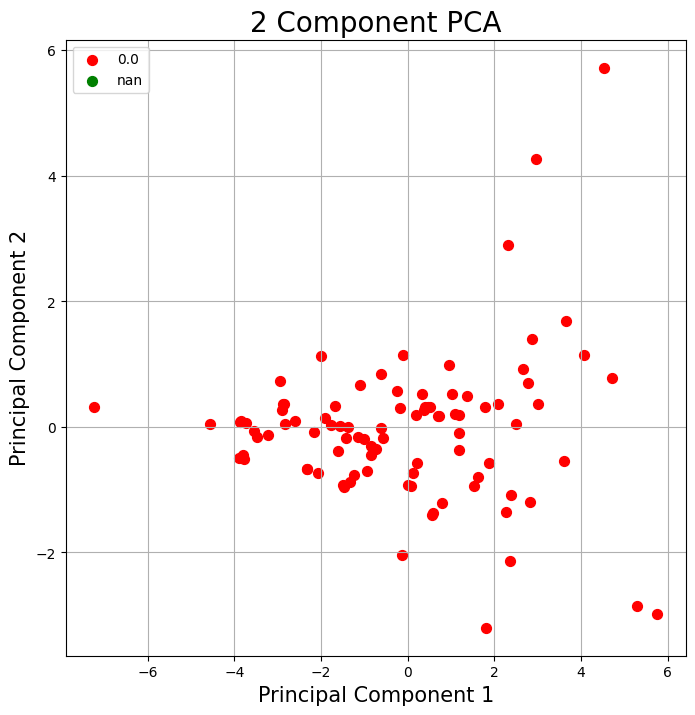

In [62]:
# Menambahkan kolom target (misalnya 'partition')
finalDf = pd.concat([principalDf, pdf[['partition']]], axis=1)

# Visualisasi hasil PCA
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

# Visualisasi berdasarkan cluster (partition)
targets = finalDf['partition'].unique()
colors = ['r', 'g', 'b', 'y', 'c', 'm']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['partition'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1'],
               finalDf.loc[indicesToKeep, 'Principal Component 2'],
               c=color, s=50)
ax.legend(targets)
ax.grid()
plt.show()

Pada bagian kode ini, pertama-tama kolom 'partition' (yang bisa berisi label atau kategori cluster) ditambahkan ke DataFrame principalDf menggunakan fungsi pd.concat(). Kolom ini menghubungkan hasil PCA dengan informasi kategori (misalnya, hasil clustering) yang akan digunakan untuk visualisasi. Selanjutnya, visualisasi dilakukan dengan membuat plot sebar (scatter plot) menggunakan matplotlib. Sumbu x dan y masing-masing mewakili Principal Component 1 dan Principal Component 2, yang merupakan dua komponen utama hasil dari PCA. Setiap titik dalam plot merepresentasikan satu data point, dan warnanya ditentukan berdasarkan kategori yang ada di kolom 'partition'. Dengan cara ini, kita bisa melihat bagaimana data terdistribusi dalam dua dimensi baru dan apakah ada pemisahan yang jelas antar cluster. Setiap kategori (target) dipetakan ke warna yang berbeda untuk membedakan grup-grup yang berbeda. Legenda ditambahkan untuk mempermudah interpretasi, dan grid pada plot memberikan kemudahan dalam membaca posisi data. Akhirnya, grafik ditampilkan dengan plt.show().

Visualisasi PCA yang Anda tampilkan memberikan gambaran awal tentang struktur data Anda. Titik-titik data yang tersebar merata tanpa membentuk kelompok yang jelas mengindikasikan bahwa berdasarkan dua komponen utama yang dipilih, tidak ada pemisahan yang signifikan dalam data. Namun, interpretasi ini perlu diperdalam dengan mempertimbangkan beberapa faktor: Pertama, jumlah komponen utama yang digunakan dapat mempengaruhi hasil. Kedua, skala data yang berbeda dapat memengaruhi interpretasi. Terakhir, untuk memahami makna dari setiap komponen utama, kita perlu melihat kontribusi dari masing-masing variabel asli terhadap komponen tersebut. Secara keseluruhan, visualisasi ini memberikan gambaran awal, tetapi analisis lebih lanjut diperlukan untuk mendapatkan pemahaman yang komprehensif tentang data Anda.

In [63]:
# Menampilkan rasio variansi yang dijelaskan oleh setiap komponen
print('Explained Variance Ratio:')
print(pca.explained_variance_ratio_)

# Total variansi yang dijelaskan oleh 2 komponen utama
print('Total Explained Variance by 2 Components: %.2f' % sum(pca.explained_variance_ratio_))

Explained Variance Ratio:
[0.64006383 0.17880374]
Total Explained Variance by 2 Components: 0.82


Hasil analisis PCA menunjukkan rasio variansi yang dijelaskan oleh dua komponen utama yang dihasilkan dari dataset. Komponen pertama menjelaskan sekitar 64.01% dari total variansi, sedangkan komponen kedua menjelaskan sekitar 17.88%. Secara keseluruhan, kedua komponen ini menjelaskan sekitar 82% dari total variansi dalam data. Ini menunjukkan bahwa dua komponen utama tersebut mampu menangkap sebagian besar informasi yang terkandung dalam dataset, sehingga dapat digunakan untuk analisis lebih lanjut dan visualisasi tanpa kehilangan banyak informasi penting. Dengan demikian, penggunaan PCA dalam konteks ini efektif untuk mereduksi dimensi data sambil tetap mempertahankan struktur informasi yang signifikan.

Pada tugas ini, kita telah melakukan analisis data menggunakan Principal Component Analysis (PCA) untuk dataset cars_clus.csv. Langkah pertama yang dilakukan adalah menangani missing values dalam dataset dengan mengganti nilai "
" menjadi NaN, kemudian menghapus baris yang mengandung nilai yang hilang. Setelah itu, fitur numerik yang relevan dipilih untuk analisis PCA, dan data tersebut distandarisasi menggunakan StandardScaler agar memiliki rata-rata 0 dan variansi 1. Dengan standarisasi ini, kita memastikan bahwa setiap fitur memiliki bobot yang sama dalam analisis PCA, tanpa ada fitur yang mendominasi karena skala yang berbeda.

Selanjutnya, PCA diterapkan untuk mengurangi dimensi data menjadi dua komponen utama, yang memungkinkan kita untuk memvisualisasikan data dalam dua dimensi. Visualisasi hasil PCA menunjukkan bagaimana data terdistribusi dalam ruang komponen utama, serta bagaimana masing-masing kategori dalam kolom 'partition' (yang mewakili cluster atau label) tersebar di ruang tersebut. Hal ini memberikan wawasan tentang pemisahan antar kategori dan pola yang mungkin ada dalam data.

Dari hasil analisis, kita juga dapat melihat rasio variansi yang dijelaskan oleh setiap komponen utama. Dengan dua komponen utama, kita bisa mengamati seberapa besar kontribusi setiap komponen dalam menjelaskan variabilitas data. Dengan demikian, tugas ini menunjukkan bagaimana PCA dapat digunakan untuk mereduksi dimensi data, memudahkan visualisasi, dan memberikan pemahaman lebih baik mengenai struktur data yang ada.